# Dream in Color - Technical Report
- A project by Laura Markham Prescott

# Table of Contents

<a href="intro">Introduction</a>

<a href="materials">Materials and Methods</a>

<a href="model_building">Model Building</a>

<a href="image_prep">Image Preprocessing and Data Preparation</a>

<a href="architecture">Convonet Architecture</a>

<a href="evaluation">Model Evaluation</a>

<a href="selection">Model Selection</a>

<a href="production">Production</a>

<a href="features">Extra Features</a>

<a href="conclusions">Conclusions and Future Work</a>

<a href="resources">Some Resources</a>

______________________________________________________________

<a href="app_a">Appendix A: Color Selection</a>

<a href="app_b">Appendix B: SQL</a>

<a href="app_c">Appendix C: Data to csv</a>

<a href="app_d">Appendix D: K Nearest Neighbors</a>

<a href="app_e">Appendix E: Image Download and Preparation</a>

<a href="app_f">Appendix F: 35 Color Class Convonet</a>

<a href="app_g">Appendix G: Model_35 Evaluation Metrics</a>

<a href="app_h">Appendix H: Model Classification Snapshot</a>

<a href="app_i">Appendix I: Cosine Similarity Matrix</a>

# Introduction
<a id="intro"></a>
In traditional wedding planning, the bride chooses one color and style of dress for all of her bridesmaids to wear. A new trend called "Mismatched Bridesmaids" diverges from the aforementioned tradition and is growing in popularity. To achieve the "Mismatched Bridesmaid" look, each bridesmaid has a different style and/or color of dress that all fit within a common theme or palette. 


## Traditional Bridesmaids
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3QrBz1S6V22JX2oZDZwLZHxG_IRMu4420_UrwYkYMSlPBTUHaCg"> 

## Mismatched Bridesmaids
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLxG6H-DCM2kLr2DwX_NRvKzNvZMfoAK91XurYbYVTEeCMQSNRog">
<img src="http://cdn-img.instyle.com/sites/default/files/styles/622x350/public/images/2016/06/063016-mismatched-bridesmaids-lead.jpg?itok=2gRgIn8Y">

Currently there are no tools to make this look easy to achieve. Most online bridesmaid dress retailers don't provide enough variety and flexibility of color choice for dress sorting/identification to fit this new trend. Likewise, many retail websites don't have products to fit bridesmaids of all shapes, sizes, and budgets. In the end, one group of bridesmaids will end up visiting several different retailers, online and in person, contacting the bride over and over to make sure they get it right.

To address this problem, I aimed to do the following:
- create a machine learning algorithm that can classify dresses into several, specific color classes
- apply this model to dresses currently available for purchase online
- make the application available for brides and bridesmaids

# Materials and Methods
<a id="materials"></a>
I approached this project as an image classification problem. I wanted to be able to classify dresses based on the pictures available from online retailers. Images are available for every dress sold online, whereas a description or color-name is not always available or consistent across retailers. In the end, it's all about how the dresses look, and that is best evaluated and compared via images!

## Web Development
Robb Prescott did the web development work for this project. We discussed visions for the final web application from the beginning so our work would be guided with the same goals in mind. He built a labeling website for data collection and a final website for the product, all discussed below.

## Data Collection
A lot of images are required to train a successful image classification algorithm. I used two bulk image downloading applications to gather images from the web:
- Bulk Download Images(ZIG)
- Fatkun Batch Download Image

Model building images were gathered from google image searches, google shopping searches, as well as some online clothing retailer websites. Quality of images ranged widely from retail/professional quality to cell phone pictures.

### Color Label Selection
I looked through several websites for ideas on how to organize and display color and color options on the web. Robb and I decided to use the resources available here for the project: 
https://www.materialpalette.com/colors

Robb provided the json data from the above website with information for all the colors as hexidecimal codes. I converted the hex codes to RGB values, created a function for plotting chosen colors, and narrowed my color labels down from 254 (number of colors from the material palette website) to 64 color labels for my project. Code is shown in <a href="app_a">Appendix A: Color Selection</a>.

['a1', 'b2', 'c3', 'd4', 'e5', 'f6', 'g7', 'h8', 'i9', 'j10', 'k11', 'l12', 'm13', 'n14']


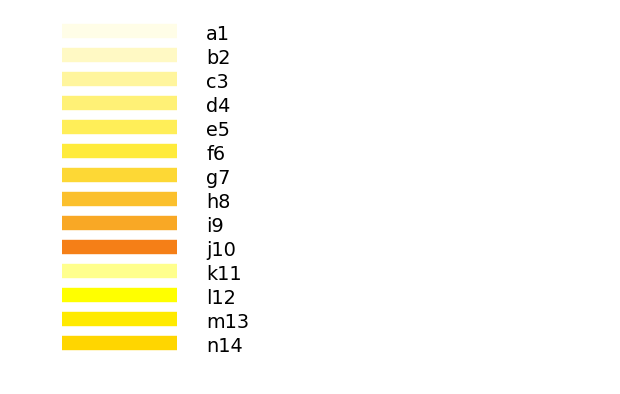

In [81]:
yellow = df[df['family'] == 'yellow']
yellow = yellow.reset_index()

#I viewed colors like this
plot_colors(yellow)

<a id="after_a"></a>
### Labeling Data
After the colors were selected, Robb set up a website with heroku for labeling the data:
- color.suprinfinity.com

New users are prompted to set up an account. User accounts were helpful for tracking the applied labels, but this system also caused some issues with Mechanical Turk later down the line.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-06-01+at+11.14.51+AM.png" style="width:300px;">

After creating an account, the user could label images with our labeling system. An image is shown on the left side of the screen, and labels to choose from are on the right.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-05-30+at+5.08.13+PM.png" style="width:600px;">

Clicking one of the color groups shown above reveals more specific colors to choose from for labeling. There are 64 total color labels.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-05-30+at+5.07.33+PM.png" style="width:600px;">

Once an image is labeled, the data is collected in a Postgres database. Other labels (aside from color) were collected for potential use in the project:
- Image Details labels helped me exclude certain types of pictures from my models
- Length and Fabric labels were not used in the current project, but may be used for future improvements/features. 

I collected **18,630** images, which are stored in an Amazon Web Services (AWS) S3 bucket. In order to get enough images labeled for the project, I outsourced labeling tasks through **Amazon Mechanical Turk (MTurk)**.

<img src="https://onlinegrindseason.files.wordpress.com/2015/02/pp_img_3_col_mechanical_turk_good_logo_no_artificial_2378x171.png">

While MTurk was effective for getting a large quantity of labels completed, the quality of labeling work was not good. To get better labels from MTurk in the future, I would:
- set up labeling directly through AWS on MTurk instead of my own outside site (avoids violating terms of service)
- collect different types of labels in separate tasks
    - i.e. color labeling as one task; image type labeling as a separate task; length labeling as separate task.
- establish my reputation on MTurk
- pay more money per task
- only allow proven workers
- make larger tasks

### Cleaning Data - Labels

After using MTurk, I spent several days re-labeling (cleaning) the dataset before it was in acceptable shape for modeling. It is important to have a way to easily display all the image data and their corresponding information for effective re-labeling. I used the 'Admin Dresses' page of our labeling website to accomplish this task. This feature allows me to view all the dresses and their labels, as well as view all images under a specific label. For example, the screenshot below shows the first few dresses that are labeled with the color 'teal5'. I manually changed labels in our postgreSQL database and used some python code to generate SQL queries for bulk relabeling (<a href="app_b">Appendix B: SQL</a>).

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Untitled+drawing+(1).jpg" style="width:300;">


<a id="after_b"></a>
### Cleaning Data - to csv

Data from the database also needed to be cleaned before images could be downloaded and used for modeling. <a href="app_c">Appendix C: Data to csv</a> <a id="after_c"></a>shows how data from the database was cleaned and prepared for modeling. This included: 
- Excluding 'bad' and 'bride' images
    - 'Bad' and 'bride' images were excluded due to their quality and potential negative impacts during modeling.
- Excluding 'multicolor' dresses
    - Labeling for these dresses was inconsistent and innacurate. This is an interesting problem to tackle for another project.
- Reconciling multiple labels
    - I was originally intending to have every image labeled more than once for data validation. However, given the time and scope of the project, that was not an attainable goal. Robb re-programmed the labeling site to default select images that hadn't been labeled yet. There was some overlap before this setting was adjusted as well as when multiple people were labeling simultaneously.


# Model Building
<a id="model_building"></a>
In order to create a viable product to address the stated problem, I wanted my model to have a higher number of color classes than available on typical clothing retail websites. I used between **30 to 35 color classes** in all of my models. These color classes were constructed of different combinations of the original 64 color labels. The model building process involved dynamic movement between building/running/evaluating models, re-cleaning data for clearer class separation, and combining or separating color labels for different combinations.


## K Nearest Neighbors

I applied K Nearest Neighbors without much success. For 31 color classes, 3.7% was the highest accuracy I achieved. See <a href="app_d">Appendix D: K Nearest Neighbors</a> <a id="after_d"></a> for some code and results. Given the computational process of K Nearest Neighbors, I did not expect great results. This algorithm would not handle variation in backgrounds or subject well, but I wanted to apply it as a sort of secondary baseline.

**True Baseline** was between 4% to 5% in all my models due to some minor class imbalance. The Black and Navy color classes had more images than others. Adjusting for class imbalance is another strategy I would like to try in the future to improve model performance which will require more labeled images.

## Convolutional Neural Networks

Convolutional Neural Networks (convonets) are effective for image classification problems, thus I spent the bulk of my modeling time building these for my application. While collecting data from MTurk, I built a preliminary 12 color classification convonet on a small sample of labeled images. This helped me test my modeling pipeline as well as locate and resolve weak points in my process.

### Google Cloud Compute Engine
First, I needed more computing power before increasing the number/size of images and the width/depth of my convonet. I applied for access to a graphics processing unit (GPU) from Google Cloud Compute and AWS. I decided to use Google Cloud Compute Engine because of their prompt reply to my request for a GPU. I set up an Ubuntu virtual machine (8 vCPUs, 52 GB memory) with one NVIDIA Tesla K80 GPU and set up tensorflow-gpu with Keras for modeling.


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlsZKALQ85fGkobZpv4rC4wUAgmIlyPSkLNe2IyWiuH-eNlwHT" style="width:300;">
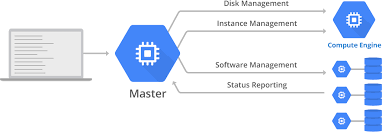

### Image Preprocessing and Data Preparation
<a id="image_prep"></a>
Due to the relatively small number of images for each class, I used Keras preprocessing tools (ImageDataGenerator) to augment images for modeling. Below is an example of how this Keras tool works. By stretching, flipping, and applying other modifications, the same image can be used multiple times, effectively increasing my sample size for training the model.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Data+Augmentation.jpg" style="width:600;">

In order to use the ImageDataGenerator feature of keras, images had to be stored according to a specific file structure (example shown below). Thus, each time I made adjustments to image labels or color class combinations, images needed to be re-downloaded and arranged within the appropriate file structure. In order to accomplish this more effectively, I used python to generate command line scripts to help automate the following:
1. Create a .txt file for image downloading
2. Train test split by color group
3. Populate .txt files with appropriate URLs for downloading
4. Create appropriate directories for file storage
5. Download images to correct directories
6. Resize, center, and fill white on each image

Code for the above process is shown in <a href="app_e">Appendix E: Image Download and Preparation</a>. <a id="after_e"></a>

### Convonet Architecture
<a id="architecture"></a>
I tried several variations on parameters, and the most effective convonet architecture for this project is shown and described below. It typically required between 75 to 150 epochs to converge without overfitting to the training data. More details on the final model architecture and performance are shown in <a href="app_f">Appendix F: 35 Color Class Convonet</a>.<a id="after_f"></a>

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
__________

### Model Evaluation
<a id="evaluation"></a>
To evaluate performance of each model, I first looked at typical performance metrics:
- accuracy
- precision
- recall
- f1 score

These metrics helped me refine initial model parameters, adjust color class segmentations, and identify high and low performing models without overly time-consuming evaluation. Via this process, I created an effective convonet with 31 color classes (Model_31).

**Model_31**
- Overall Model Accuracy: 81 %
- Average Precision:      81 %
- Average Recall:         80 %
- Average F1:             81 %

To further evaluate Model_31, I looked at performance within each color group:
- Create a dataframe for each color group
- View model predictions within each color group
- View images with incorrect predicted values

With this process, I made two key observations about images the model labeled incorrectly, and I addressed each accordingly:
1. **The model was often predicting a very close color group**
    - For the purposes of my product, this is an acceptable outcome. For instance, a light yellow dress may be classified as a yellow dress. It is still within the same color family and will likely be seen by bridesmaids perusing for light yellow dresses. However, a light yellow dress classified incorrectly as emerald green is not acceptable for several reasons.
    - Due to the above, I created my own **"Close Scoring"** metrics to evaluate models. I calculated a "Close Overall Model Accuracy" and a "Close Recall" score within 1 and 2 color groups. This involved counting any classification within 1 or 2 close color groups as a "Close Positive" in place of a "True Positive". Code shown in Appendix G for the final selected model (more description and link below).
    
    
2. **The model was actually correctly labeling some of the images (I had incorrectly labeled them)**
    - I discovered several images in color groups had been mislabeled before modeling. For example, the model classified several grey dresses as beige. When I opened those images, they were actually beige dresses that I had labeled incorrectly.
    - Due to this discovery in evaluating Model_31, I went back and further cleaned my data before building more models.
    
The below image demonstrates both stated observations. It shows images from the **CORAL** group that were incorrectly labeled as dark_pink or light_pink.
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-06-06+at+1.06.43+PM.png" style="width:500;">
\*above images and classification actually from final selected model (Model_35)

### Model Selection
<a id="selection"></a>
After further cleaning labels and trying several more models, I used the above process to select my final model: **Model_35**. Convonet details are described in <a href="app_f">Appendix F</a>. Evaluation metrics are shown in <a href="app_g">Appendix G: Model_35 Evaluation Metrics</a>.<a id="after_g"></a>

**Model_35 Score Summary:**
- Overall Model Accuracy:   79 %
- Average Precision:        80 %
- Average Recall:           79 %
- Average F1:               78 %
- Average Close (1) Recall: 87%
- Average Close (2) Recall: 93%

The below image shows True and Close(2) recall scores across color groups.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-06-06+at+2.50.48+PM.png" style="width:500;">

Nude
- Based on scores, the model does not appear to classify Nude dresses effectively. Scores are likely low due to **overlap in labeling** with close color groups. The Nude, Blush, Beige, Golden Tan, and Rose color groups all contain very similar dress colors. These are some of the most common bridesmaid dress colors, so I wanted to have separate options for them if possible. **Better labeling may improve scores.** Though the model doesn't appear to perform well on this category, it actually does an effective job when put into production.

Latte
- Scores in this color category are also low, but likely for a different reason: **class imbalance**. The image below shows each color category and the total number of images I collected in each category. Latte (brown) had the fewest images. However, Chocolate (dark_brown) and Golden Tan also had much fewer images than other color categories but performed well overall. **Alleviating class imbalance might improve model scores across color groups**. Again, the model actually did an effective job categorizing Latte dresses when put into production.

Silver
- High scores in this category indicate the model should categorize Silver dresses accurately. When put into production, the model did not perform as well as expected for this category. This is again likely due to mislabeling within the category and also some potential background and image quality noise. More training images and better labeling would likely improve this performance

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/class+imbalance.jpg" style="width:300;">

# Production: 
<a id="production"></a>
http://dreamincolor.suprinfinity.com

In order to create a viable product using my model, I needed to collect data on currently available dresses to categorize and display to users. I scraped data from the following six major online bridesmaid dress retailers:
- Nordstrom
- Weddington Way
- Lulus
- Asos
- The Dessy Group
- The Knot

I used Xpath, scrapy spiders, and other strategies to gather data from these websites. For every dress, I collected the following:
- Dress image link
- Price
- Link to the product
- Product name
- Retailer name

After cleaning and compiling the data, I used my model to predict color classes from the images and provided everything to Robb for integration with the website. Robb completed all the web development work for dreamincolor.suprinfinity.com. I stored production images in another AWS S3 bucket for production access, and the website was set up through Heroku with a postgres database.

I collected a total of **3670 dresses** for display on the website.

Visitors to the site can select up to 5 color categories to view at one time. The site displays all the dresses within the chosen color category and all information associated with each dress. When the user clicks on a dress, it takes her directly to the purchase page from the retailer.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-06-06+at+3.23.33+PM.png" style="width:600;">

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/17+emerald.png" style="width:600;">

The above image shows an example of how dresses are displayed when a color is chosen. <a href="app_h">Appendix H: Model Classification Snapshot</a> <a id="after_h"></a> shows a screenshot of each color category on the website. These snapshots show the classification of every image by the chosen model. No changes have been made to dress classifications at this time.

# Extra Features
<a id="features"></a>
## Find Similar Dresses

From the last Dense layer of the Model_35 convonet, I extracted a 64 dimensional vector for every production image. This was accomplished by building a net with the same architecture, inserting weights from the layers of Model_35, and outputing the vector from the first Dense layer for each image (omitting the softmax output layer). With the set of 64 dimensional vectors, I created a cosine similarity matrix. This matrix gives a "score" for how similar dresses are based on the convonet output vector. Code is shown in <a href="app_i">Appendix I: Cosine Similarity Matrix</a>.<a id="after_i"></a>

My goal with the cosine similarity matrix was to create a feature for the website to allow users to view dresses similar to the ones they like. My hope was that, within the convolutions of the neural network, some dress features other than color might be captured (i.e. length, fabric texture, sheen). I looked at a few examples, and this appears to have been successful.

Below, I chose a long, champagne-colored, sequine dress (outlined image top left). The top most similar dresses from the matrix were all long, very similar in color, several with some sort of sheen, texture, or sequins.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-05-30+at+5.10.49+PM.png" style="width:600;">

In the second test (below) I chose another long, sequin dress. This reference dress (outlined image top left) is navy, but the model misclassified it as black. Interestingly, all the most similar dresses from the cosine similarity matrix were correctly classified as navy. They were also long and some had sequins or lace.

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-05-30+at+5.10.59+PM.png" style="width:600;">

The effectiveness of the cosine similarity matrix for finding similar dresses appears fairly successful. Performance on a larger scale still needs to be assessed. It would be useful to find the weak points in this feature, identifying at what number of dresses is there a noticeable divergence in style/color similarity. I imagine this will be heavily influenced by the number of dresses available in the reference dress color category.

## Other Similar Products

From hair accessories to statement jewelry all the way down to toenail polish and matching wedges, there is a lot more to a bridesmaid's ensemble than her dress alone. Likewise, groomsmen are expected to match, too (think bowties, suspenders, pocket squares, socks). With this in mind, I wanted to see if my convonet could be used on other wedding-party related products. 

I tested this theory on bowties first. Retail images for ties and bowties are usually focused on the product, with a simple background and not much other noise. Model_35 was very effective in identifying the color class of a small sample of bowties. The image below shows the bowtie and the model predicted color class. Further evaluation of effectiveness is warranted, and this looks like a very promising potential feature for the website!

<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/Screen+Shot+2017-05-30+at+5.11.22+PM.png" style="width:600;">

# Conclusions and Future Work
<a id="conclusions"></a>
Using a convolutional neural network to classify dress images was an effecive approach for accomplishing my goals. Data collection, cleaning, and labeling was the most important and time-intensive part of the project. The final website provides many more color choices than typical online retailers, and it is a great starting point with potential for improvements in many areas.

## Future Model Improvements

### Data Collection, Label Cleaning
Model performance is only as good as the data allows. The cleaner the data and better segmented the color classes, the better the model will perform. Likewise, more data will help performance.

A Better Labeling Approach
- Currently, I can only view dresses on the "Admin Dresses" site that have received a label from our website. To improve the data collection process, I'd like to create a tag for "unlabeled", which allows me to view all the images through my website and more quickly add labels to the database manually.

Class Imbalance
- Resolving some of the class imbalance may improve the performance of the convonet. I will need to collet and label more images in the lacking color classes.

Background Subtraction/RGB Histograms
- I may try applying background subtraction to the images, then labeling based on most frequent RGB values. I could use the images I already have in each color class to help identify RGB ranges for labeling.

Label Like-Images
- Leveraging the current data-set may also be possible for gathering more/better/different data. Instead of having people label with color swatches, they could select images with like-colors. This process could be used to label by color groups and could also be used for different types of convonet modeling.

### More Models

General Improvements
- After collecting more data and improving the labels, I'd like to build a similar convonet that performs better than the current one. With more time and work, that is definitely possible.

Localization/Similarity
- A convonet that can identify the location of a dress (or other product) in an image could be very useful for this application. This would require a different kind of data labeling. With localization abilities and data on alike-images, it may be possible to build a model that can take in an image and return like-dresses.

Transfer Learning
- I may be able to achieve greater accuracy in labeling with transfer learning (i.e. using a pre-trained architecture like VGG-16 or Inception V3). I had originally intended to try this, which is why I chose 299x299 for my input image size. Overall, I don't think the improvements I would get from transfer learning would be worthwhile until the dataset is improved (cleaner labeling, more balanced classes).

## Future Website Improvements

I have a lot of ideas for improving the website which were not within the scope of the original project. Ideas for website improvement include:

More retailers
- Partnerships to eliminate need for scraping
- Wider selection of dresses in general
    
Automated data collection process

Special features (described above)
- Click for similar dresses
- Matching accessories (bowties etc.)

Bride Accounts
- Bride sets up her "shop" and invites bridesmaids
       - chooses colors
       - removes dresses she doesn't like
- Drag and drop image slots to lock in purchased dresses
- Image upload if a bridesmaid gets a dress somewhere else

Color-coded like buttons (by bridesmaid)

Channeled dress viewing
- When a color is selected, it displays column-wise

### Some Resources
<a id="resources"></a>
**Image Downloading**

Bulk Download Images(ZIG): https://chrome.google.com/webstore/detail/bulk-download-imageszig/gfjhimhkjmipphnaminnnnjpnlneeplk?hl=en

Fatkun Batch Download Image: https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf?hl=en


**Stanford cs231 notes and lecture videos**

http://cs231n.github.io/

https://www.youtube.com/watch?v=yp9rwI_LZX8&index=1&list=PLjX3tKChumyCOstk6GO8PeEjwmcz7jWia

**Keras tutorial**

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

<a id='app_a'></a>
# Appendix A: Color Selection

In [1]:
#opening the json file robb made initially
with open('../capstone/color_data_json.json') as data_file:    
    data = json.load(data_file)

pprint(data)

[{u'android': u'red',
  u'default': {u'contrast': u'white', u'hex': u'#f44336', u'strength': 500},
  u'key': u'red',
  u'name': u'red',
  u'shades': [{u'contrast': u'black', u'hex': u'#ffebee', u'strength': 50},
              {u'contrast': u'black', u'hex': u'#ffcdd2', u'strength': 100},
              {u'contrast': u'black', u'hex': u'#ef9a9a', u'strength': 200},
              {u'contrast': u'black', u'hex': u'#e57373', u'strength': 300},
              {u'contrast': u'black', u'hex': u'#ef5350', u'strength': 400},
              {u'contrast': u'white', u'hex': u'#f44336', u'strength': 500},
              {u'contrast': u'white', u'hex': u'#e53935', u'strength': 600},
              {u'contrast': u'white', u'hex': u'#d32f2f', u'strength': 700},
              {u'contrast': u'white', u'hex': u'#c62828', u'strength': 800},
              {u'contrast': u'white', u'hex': u'#b71c1c', u'strength': 900},
              {u'contrast': u'black',
               u'hex': u'#ff8a80',
               u'stren

              {u'contrast': u'black',
               u'hex': u'#80d8ff',
               u'strength': u'A100'},
              {u'contrast': u'black',
               u'hex': u'#40c4ff',
               u'strength': u'A200'},
              {u'contrast': u'black',
               u'hex': u'#00b0ff',
               u'strength': u'A400'},
              {u'contrast': u'white',
               u'hex': u'#0091ea',
               u'strength': u'A700'}]},
 {u'android': u'cyan',
  u'default': {u'contrast': u'white', u'hex': u'#00bcd4', u'strength': 500},
  u'key': u'cyan',
  u'name': u'cyan',
  u'shades': [{u'contrast': u'black', u'hex': u'#e0f7fa', u'strength': 50},
              {u'contrast': u'black', u'hex': u'#b2ebf2', u'strength': 100},
              {u'contrast': u'black', u'hex': u'#80deea', u'strength': 200},
              {u'contrast': u'black', u'hex': u'#4dd0e1', u'strength': 300},
              {u'contrast': u'black', u'hex': u'#26c6da', u'strength': 400},
              {u'contrast': u'w

              {u'contrast': u'black', u'hex': u'#ffc107', u'strength': 500},
              {u'contrast': u'black', u'hex': u'#ffb300', u'strength': 600},
              {u'contrast': u'black', u'hex': u'#ffa000', u'strength': 700},
              {u'contrast': u'black', u'hex': u'#ff8f00', u'strength': 800},
              {u'contrast': u'black', u'hex': u'#ff6f00', u'strength': 900},
              {u'contrast': u'black',
               u'hex': u'#ffe57f',
               u'strength': u'A100'},
              {u'contrast': u'black',
               u'hex': u'#ffd740',
               u'strength': u'A200'},
              {u'contrast': u'black',
               u'hex': u'#ffc400',
               u'strength': u'A400'},
              {u'contrast': u'black',
               u'hex': u'#ffab00',
               u'strength': u'A700'}]},
 {u'android': u'orange',
  u'default': {u'contrast': u'black', u'hex': u'#ff9800', u'strength': 500},
  u'key': u'orange',
  u'name': u'orange',
  u'shades': [{u'contras

In [2]:
#how many shades in each color family?
for dictionary in data:
    print dictionary['name']
    print len(dictionary['shades'])

red
14
pink
14
purple
14
deep purple
14
indigo
14
blue
14
light blue
14
cyan
14
teal
14
green
14
light green
14
lime
14
yellow
14
amber
14
orange
14
deep orange
14
brown
10
grey
10
blue grey
10


In [7]:
#converting hexadecimal codes to RGB values
rgbs = []
hexadecimals = []
for dictionary in data:
    for shade in dictionary['shades']:
        hexa = shade['hex'][1:]
        rgb = tuple(int(hexa[i:i+2], 16) for i in (0, 2 ,4))
        hexadecimals.append(hexa)
        rgbs.append(rgb)

#making a dataframe for easier viewing/editting
df = pd.DataFrame(hexadecimals, columns=['hex_code'])
df['rgb'] = rgbs

#adding color families to the dictionary
labels = []
for dictionary in data:
    for i in range(len(dictionary['shades'])):
        labels.append(dictionary['name'])
df['family'] = labels  

#created new labels for easier organization, viewing, and moving in the color selection process
labels = []

def new_labels(number):
    for i in range(number):
        label = (i+1)
        labels.append(label)

color_numbers = [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 10, 10, 10]

for number in color_numbers:
    new_labels(number=number)
    
labels
df['labels'] = labels

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1,
 2,
 3,
 4,
 5,
 6,


In [10]:
#Here are the original 254 colors from the material palette website
df

,hex_code,rgb,family,labels
0,ffebee,"(255, 235, 238)",red,1
1,ffcdd2,"(255, 205, 210)",red,2
2,ef9a9a,"(239, 154, 154)",red,3
3,e57373,"(229, 115, 115)",red,4
4,ef5350,"(239, 83, 80)",red,5
5,f44336,"(244, 67, 54)",red,6
6,e53935,"(229, 57, 53)",red,7
7,d32f2f,"(211, 47, 47)",red,8
8,c62828,"(198, 40, 40)",red,9
9,b71c1c,"(183, 28, 28)",red,10


In [14]:
#function for plotting and viewing colors in jupyter notebook with matplotlib

from __future__ import division
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


# colors_dic = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
def plot_colors(df):
    colors_dic = {}
    for i, key in enumerate(df['letter']):
        hexa = '#' + str(df['hex_code'][i])
        colors_dic[key] = hexa
    
    sorted_names = sorted([name for name, color in colors_dic.iteritems()])
    
    n = len(sorted_names)
    ncols = 1
    nrows = n // ncols

    fig, ax = plt.subplots(figsize=(8, 5))

    # Get height and width
    X, Y = fig.get_dpi() * fig.get_size_inches()
    h = Y / (nrows + 1)
    w = X / ncols

    for i, name in enumerate(sorted_names):
        col = i % ncols
        row = i // ncols
        y = Y - (row * h) - h

        xi_line = w * (col + 0.05)
        xf_line = w * (col + 0.25)
        xi_text = w * (col + 0.3)

        ax.text(xi_text, y, name, fontsize=(h * 0.8),
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y + h * 0.1, xi_line, xf_line,
                  color=colors_dic[name], linewidth=(h * 0.6))

    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_axis_off()

    fig.subplots_adjust(left=0, right=1,
                        top=1, bottom=0,
                        hspace=0, wspace=0)
    print sorted_names
    plt.show()

['a1', 'b2', 'c3', 'd4', 'e5', 'f6', 'g7', 'h8', 'i9', 'j10', 'k11', 'l12', 'm13', 'n14']


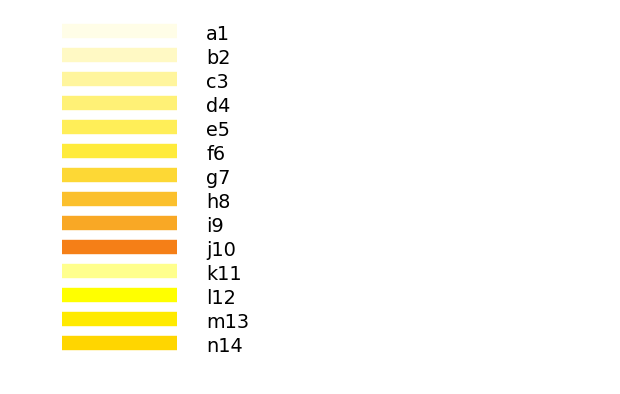

In [81]:
yellow = df[df['family'] == 'yellow']
yellow = yellow.reset_index()

#I viewed colors like this
plot_colors(yellow)

['a1', 'b2', 'c3', 'd11', 'e4', 'f12', 'g5', 'h6', 'i13', 'j14', 'k7', 'l8', 'm9', 'n10']


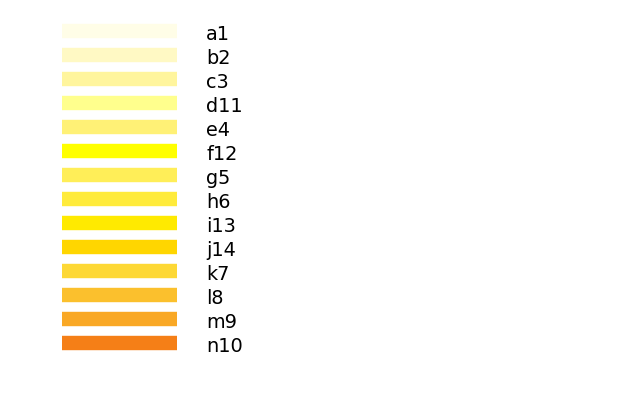

In [82]:
#rearrange their order by hue
reorder = ['a1', 'b2', 'c3', 'e4', 'g5', 'h6', 'k7', 'l8', 'm9', 'n10', 'd11', 'f12', 'i13', 'j14']
yellow['letter'] = reorder
plot_colors(yellow)

In [83]:
#select the colors I wanted to keep
keep = ['b2', 'd11', 'g5', 'i13', 'k7', 'm9', 'f12']

yellow_keep = yellow[yellow['letter'].isin(keep)]
del yellow_keep['index']
yellow_keep = yellow_keep.reset_index()
del yellow_keep['index']
yellow_keep

,hex_code,rgb,family,labels,letter
0,fff9c4,"(255, 249, 196)",yellow,2,b2
1,ffee58,"(255, 238, 88)",yellow,5,g5
2,fdd835,"(253, 216, 53)",yellow,7,k7
3,f9a825,"(249, 168, 37)",yellow,9,m9
4,ffff8d,"(255, 255, 141)",yellow,11,d11
5,ffff00,"(255, 255, 0)",yellow,12,f12
6,ffea00,"(255, 234, 0)",yellow,13,i13


['b2', 'd11', 'f12', 'g5', 'i13', 'k7', 'm9']


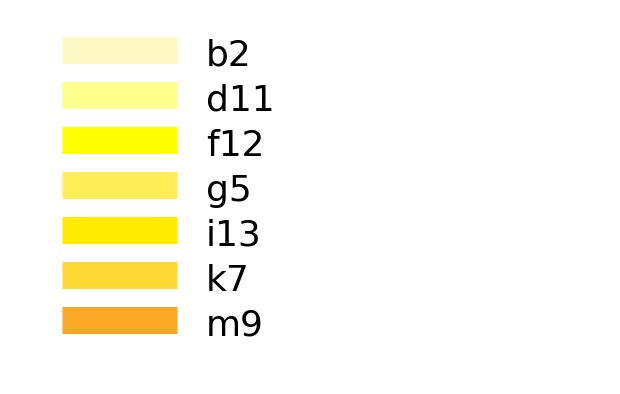

In [84]:
#and view the final selections
plot_colors(yellow_keep)

['dg', 'dk', 'dm', 'do', 'dr']


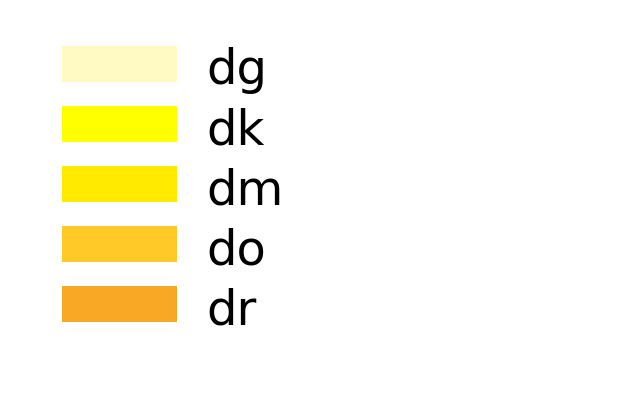

In [150]:
# I also combined like combinations later and narrowed down further
# i.e. combining yellow with dark yellow
lose = ['di', 'dj', 'dl', 'dn', 'dp', 'dq', 'dh']
yellows = yellows[~yellows['letter'].isin(lose)]

plot_colors(yellows.reset_index())

[GO BACK TO REPORT](#after_a)

<a id='app_b'></a>

# Appendix B: SQL

In [ ]:
#CHANGE A COLOR LABEL
UPDATE dress_labels
SET label_id = 57
FROM dresses
WHERE dress_labels.dress_id = dresses.id
AND dress_labels.label_id = 54
AND dresses.aws_filename = '032-sh-charcoal.jpeg';

In [ ]:
#DELETE ALL ENTRIES FOR A BAD IMAGE or bad label
DELETE FROM dress_labels USING dresses
WHERE dress_labels.dress_id = dresses.id
AND dresses.aws_filename = '026-dessy1.jpg';

In [6]:
#for bulk changes to several images
change_files = '''010-sh-light_purple.jpeg	
012-sh-light_purple.jpeg	
024-sh-light_purple.jpeg	
026-sh-purple.jpeg	
033-sh-light_purple.jpeg	'''

list_files = change_files.split('\n')
files2 = []
for item in list_files:
    item = item.replace('\t', '')
    files2.append(item)

for filename in files2:
    print "OR dresses.aws_filename = '" + filename + "'"

OR dresses.aws_filename = '010-sh-light_purple.jpeg'
OR dresses.aws_filename = '012-sh-light_purple.jpeg'
OR dresses.aws_filename = '024-sh-light_purple.jpeg'
OR dresses.aws_filename = '026-sh-purple.jpeg'
OR dresses.aws_filename = '033-sh-light_purple.jpeg'


In [ ]:
#copy and paste above into the query
#copy and paste the query into terminal for direct changes to the database
UPDATE dress_labels
SET label_id = 54
FROM dresses
WHERE dress_labels.dress_id = dresses.id
AND dress_labels.label_id = 57
AND
(dresses.aws_filename = '010-sh-light_purple.jpeg'
OR dresses.aws_filename = '012-sh-light_purple.jpeg'
OR dresses.aws_filename = '024-sh-light_purple.jpeg'
OR dresses.aws_filename = '026-sh-purple.jpeg'
OR dresses.aws_filename = '033-sh-light_purple.jpeg');

[GO BACK TO REPORT](#after_b)

<a id='app_c'></a>

# Appendix C: Data to csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import psycopg2
import urlparse

In [2]:
db_object = open('/Users/Markham/.infinitecolordb.conf', 'r')
key = db_object.read()
key = key.replace('\n', '')

urlparse.uses_netloc.append("postgres")
url = urlparse.urlparse(key)

conn = psycopg2.connect(
    database=url.path[1:],
    user=url.username,
    password=url.password,
    host=url.hostname,
    port=url.port
)

In [3]:
sql = '''
SELECT 
dress_labels.user_id, 
dress_labels.dress_id, 
dresses.url,
dresses.aws_filename,
dress_labels.label_id,
labels.value,
labels.cat

FROM dress_labels
JOIN labels
ON dress_labels.label_id = labels.id
JOIN dresses
ON dress_labels.dress_id = dresses.id
'''

df = pd.read_sql(sql, con=conn)
df

,user_id,dress_id,url,aws_filename,label_id,value,cat
0,2.0,564,https://s3-us-west-2.amazonaws.com/capstonepic...,013-sh-tan.jpeg,5,short,length
1,2.0,564,https://s3-us-west-2.amazonaws.com/capstonepic...,013-sh-tan.jpeg,1,single_dress,image
2,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,74,grey5,colors
3,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,1,single_dress,image
4,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,6,long,length
5,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,7,solid_color,fabric
6,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,74,grey5,colors
7,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,1,single_dress,image
8,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,6,long,length
9,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,7,solid_color,fabric


#### Look at fabric labels because they changed a few times
- tried some complex labels early in the labeling process
- decided to take them out due to labeler confusion/fatigue

In [10]:
fabrics = df[df['cat'] == 'fabric']
fabrics['value'].value_counts()

#change original df to have fixed fabric labels

def fix_fabric(row):
    if row['value'] == 'lace':
        row['value'] = 'solid_color'
    elif row['value'] == 'multi_color_other':
        row['value'] = 'multi_color'
    elif row['value'] == 'multi_color_floral':
        row['value'] = 'multi_color'
    elif row['value'] == 'multi_color_block':
        row['value'] = 'multi_color'
    elif row['value'] == 'multi_color_stripes':
        row['value'] = 'multi_color'
    elif row['value'] == 'multi_color_gradient':
        row['value'] = 'multi_color'
    return row

df = df.apply(fix_fabric, axis=1)

In [11]:
#get the dress ids for single dresses
single_i = []
for i, value in enumerate(df['value']):
    if value == 'single_dress':
        single_i.append(np.array(df['dress_id'])[i])
        
#get the dress ids for multi dresses
multi_i = []
for i, value in enumerate(df['value']):
    if value == 'multi_dress':
        multi_i.append(np.array(df['dress_id'])[i])
        
#get the dress ids for bride
bride_i = []
for i, value in enumerate(df['value']):
    if value == 'bride':
        bride_i.append(np.array(df['dress_id'])[i])  
                
#get the dress ids for solid colors
solid_c = []
for i, value in enumerate(df['value']):
    if value == 'solid_color':
        solid_c.append(np.array(df['dress_id'])[i])
        
#get the dress ids for sequin/metallic colors
metal_c = []
for i, value in enumerate(df['value']):
    if value == 'sequin_metallic':
        metal_c.append(np.array(df['dress_id'])[i])
        
#get the dress ids for multi colors
multi_c = []
for i, value in enumerate(df['value']):
    if value == 'multi_color':
        multi_c.append(np.array(df['dress_id'])[i])
        
#get the dress ids for bad images
bad = []
for i, value in enumerate(df['label_id']):
    if value == 4:
        bad.append(np.array(df['dress_id'])[i])
       
print 'single: ', len(single_i)
print 'multi: ', len(multi_i)
print 'bride: ', len(bride_i)
print ' '
print 'solid: ', len(solid_c)
print 'metal: ', len(metal_c)
print 'multicolor: ', len(multi_c)
print 'bad images :', len(bad)

single:  12076
multi:  515
bride:  207
 
solid:  10148
metal:  1070
multicolor:  1591
bad images : 917


In [12]:
single_set = set(single_i)
multidress_set = set(multi_i)
bride_set = set(bride_i)

solid_set = set(solid_c)
metal_set = set(metal_c)
multicolor_set = set(multi_c)

bad_set = set(bad)

In [13]:
#get the dress ids for anything with a color label
color_labeled = []
for i, value in enumerate(df['cat']):
    if value == 'colors':
        color_labeled.append(np.array(df['dress_id'])[i])
        
len(color_labeled)

11993

In [14]:
# DRESSIDs for color labeled but not bride image, bad image, or multicolor
color_set = set(color_labeled)
color_not_bride = color_set.difference(bride_set)
color_not_bride = color_not_bride.difference(multicolor_set)
color_not_bride = color_not_bride.difference(bad_set)
len(color_not_bride)

10139

In [16]:
# creating a df of useable images and their color labels
colors_df = df[df['dress_id'].isin(color_not_bride)]
colors_df.shape

(45927, 7)

In [17]:
#selecting only color labels
color_most = colors_df[colors_df['cat'] == 'colors']

In [19]:
len(color_most)

10359

In [20]:
len(color_most['dress_id'].unique())

10139

In [21]:
# number of images with multiple color labels
len(color_most) - len(color_most['dress_id'].unique())

220

#### Reconciling multiple labels

In [22]:
#make a df of the counts of colors for each dress
color_counts = color_most['dress_id'].value_counts().reset_index()
color_counts.columns = ['dress_id', 'count']

#select only the dresses with more than one color label
#i will have to select a color for these for now
color_counts = color_counts[color_counts['count'] > 1]
color_counts

,dress_id,count
0,10278,4
1,996,3
2,14972,3
3,9285,3
4,838,3
5,8884,3
6,5579,3
7,2923,3
8,2026,3
9,9535,2


In [23]:
#getting all the color rows for each unique dress id in color_counts (>1 color label)
id_mask = df['dress_id'].isin(np.array(color_counts['dress_id'].unique()))
color_mask = df['cat'] == 'colors'

#fetching from original dataframe so I can view them via the dress url (>1 color label)
color_checks = df[(id_mask) & (color_mask)]
color_checks = color_checks.sort_values('dress_id').reset_index()
color_checks

,index,user_id,dress_id,url,aws_filename,label_id,value,cat
0,12086,3.0,26,https://s3-us-west-2.amazonaws.com/capstonepic...,001-sh-lavendar.jpeg,56,purple2,colors
1,5515,2.0,26,https://s3-us-west-2.amazonaws.com/capstonepic...,001-sh-lavendar.jpeg,56,purple2,colors
2,637,3.0,51,https://s3-us-west-2.amazonaws.com/capstonepic...,002-im-silver.jpeg,71,grey2,colors
3,135,2.0,51,https://s3-us-west-2.amazonaws.com/capstonepic...,002-im-silver.jpeg,71,grey2,colors
4,480,3.0,149,https://s3-us-west-2.amazonaws.com/capstonepic...,004-sh-brown.jpeg,70,grey1,colors
5,8188,6.0,149,https://s3-us-west-2.amazonaws.com/capstonepic...,004-sh-brown.jpeg,71,grey2,colors
6,368,2.0,276,https://s3-us-west-2.amazonaws.com/capstonepic...,007-im-white.jpeg,69,grey0,colors
7,3017,3.0,276,https://s3-us-west-2.amazonaws.com/capstonepic...,007-im-white.jpeg,69,grey0,colors
8,4427,7.0,284,https://s3-us-west-2.amazonaws.com/capstonepic...,007-sh-burnt_orange.jpeg,66,brown4,colors
9,2407,6.0,284,https://s3-us-west-2.amazonaws.com/capstonepic...,007-sh-burnt_orange.jpeg,66,brown4,colors


In [24]:
len(color_checks)

430

In [25]:
same_color = []
different_color = []
for i in range(len(color_checks)-1):
    if color_checks['dress_id'][i] == color_checks['dress_id'][i + 1]:
        if color_checks['value'][i] == color_checks['value'][i+1]:
            same_color.append(color_checks['dress_id'][i])
        else:
            different_color.append(color_checks['dress_id'][i])
#             print color_checks['dress_id'][i], color_checks['value'][i]
#             print "different from"
#             print color_checks['dress_id'][i+1], color_checks['value'][i+1]
#             print color_checks['url'][i]

In [26]:
different_color = sorted(list(set(different_color)))
len(different_color)

47

In [27]:
#I went through and hand picked colors for these
diff_dict = {149: 'grey2',
 291: 'grey2',
 476: 'brown0',
 628: 'grey4',
 996: 'orange3',
 1110: 'purple5',
 1225: 'brown5',
 1248: 'grey2',
 1628: 'brown1',
 2104: 'green6',
 2923: 'brown1',
 3234: 'grey2',
 3294: 'purple5',
 3757: 'grey4',
 4699: 'grey2',
 4867: 'pink5',
 4956: 'green5',
 5042: 'teal3',
 5681: 'teal4',
 7195: 'brown1',
 7720: 'red3',
 7840: 'red1',
 8203: 'yellow2',
 8581: 'brown0',
 8613: 'teal5',
 8807: 'brown0',
 8884: 'teal6',
 8966: 'blue3',
 9284: 'red2',
 9547: 'purple4',
 9558: 'purple7',
 9707: 'grey4',
 9741: 'red1',
 9998: 'brown1',
 10157: 'grey5',
 10325: 'brown2',
 10680: 'red3',
 11041: 'pink1',
 11150: 'pink2',
 12343: 'brown2',
 12617: 'pink1',
 13206: 'brown2',
 13834: 'blue7',
 14932: 'blue5',
 14972: 'brown3',
 15779: 'green5'}

In [28]:
print len(diff_dict)
print len(different_color)
print "numbers should be the same"

46
47
numbers should be the same


In [29]:
diff_col_set = set(different_color)

delete_these = diff_col_set.difference(set(diff_dict.keys()))
print 'delete: ', delete_these

delete:  set([6517])


In [30]:
for dress in delete_these:
    color_checks = color_checks[color_checks['dress_id'] != dress]
    color_most = color_most[color_most['dress_id'] != dress]

different_color = [x for x in different_color if x  not in delete_these]

print len(set(different_color))

46


In [32]:
#printing this before and after to verify correct changes have been made
color_most[color_most['dress_id'] == 149]

,user_id,dress_id,url,aws_filename,label_id,value,cat
480,3.0,149,https://s3-us-west-2.amazonaws.com/capstonepic...,004-sh-brown.jpeg,70,grey1,colors
8188,6.0,149,https://s3-us-west-2.amazonaws.com/capstonepic...,004-sh-brown.jpeg,71,grey2,colors


In [33]:
#overriding color choices for multiple color labels
def replace_colors(row):
    if row['cat'] == 'colors' and row['dress_id'] in different_color:
        row['value'] = diff_dict[row['dress_id']]
    return row

color_most = color_most.apply(replace_colors, axis=1)
color_most[color_most['dress_id'] == 149]
#should show the same color for each value

,user_id,dress_id,url,aws_filename,label_id,value,cat
480,3.0,149,https://s3-us-west-2.amazonaws.com/capstonepic...,004-sh-brown.jpeg,70,grey2,colors
8188,6.0,149,https://s3-us-west-2.amazonaws.com/capstonepic...,004-sh-brown.jpeg,71,grey2,colors


In [34]:
#dropping the duplicates so there is only one color label per dress
color_most = color_most.drop_duplicates(subset='dress_id', keep='first')

color_most[color_most['dress_id'] == 149]

,user_id,dress_id,url,aws_filename,label_id,value,cat
480,3.0,149,https://s3-us-west-2.amazonaws.com/capstonepic...,004-sh-brown.jpeg,70,grey2,colors


In [35]:
color_most.shape

(10138, 7)

In [36]:
color_most.head()

,user_id,dress_id,url,aws_filename,label_id,value,cat
2,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,74,grey5,colors
6,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,74,grey5,colors
13,1.0,5784,https://s3-us-west-2.amazonaws.com/capstonepic...,149-sh-orange.jpeg,25,orange3,colors
18,2.0,2743,https://s3-us-west-2.amazonaws.com/capstonepic...,066-sh-seafoam_green.jpeg,43,teal4,colors
21,2.0,5042,https://s3-us-west-2.amazonaws.com/capstonepic...,127-sh-turquoise.jpeg,42,teal3,colors


In [37]:
# creating a csv for use throughout the modeling process
color_most.to_csv(path_or_buf='./color_most_1.csv')

[GO BACK TO REPORT](#after_c)

<a id='app_d'></a>

# Appendix D: K Nearest Neighbors

In [4]:
from skimage import color, exposure, transform, io
import numpy as np
import pandas as pd

#### Create the Knn train set and targets

In [8]:
X_train_pics = io.imread_collection('../colors_30/knn/train/*.jpg')
#31 color classes

In [9]:
X_train_array = np.array(X_train_pics)
X_train_array.shape

(7001, 299, 299, 3)

In [10]:
train_files = [x.split('/')[-1] for x in X_train_pics.files]
train_names = [x.split('.')[0] for x in train_files]

In [15]:
train_names[0:10]

['001-aqua-priority',
 '001-asos1',
 '001-dessy1',
 '001-dessy8',
 '001-green-priority',
 '001-im-red',
 '001-im-silver',
 '001-nordsbride3',
 '001-nordsbride5',
 '001-nordsbride6']

In [11]:
color_most = pd.read_csv('../csv_files/color_most_1.csv')

In [13]:
color_most.head()

,Unnamed: 0,user_id,dress_id,url,aws_filename,label_id,value,cat
0,2,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,74,grey5,colors
1,6,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,74,grey5,colors
2,13,1.0,5784,https://s3-us-west-2.amazonaws.com/capstonepic...,149-sh-orange.jpeg,25,orange3,colors
3,18,2.0,2743,https://s3-us-west-2.amazonaws.com/capstonepic...,066-sh-seafoam_green.jpeg,43,teal4,colors
4,21,2.0,5042,https://s3-us-west-2.amazonaws.com/capstonepic...,127-sh-turquoise.jpeg,42,teal3,colors


In [16]:
color_most['aws_name'] = 0

def new_filename(row):
    row['aws_name'] = row['aws_filename'].split('.')[0]
    return row

color_most = color_most.apply(new_filename, axis=1)
color_most.head()

,Unnamed: 0,user_id,dress_id,url,aws_filename,label_id,value,cat,aws_name
0,2,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,74,grey5,colors,121-sh-black
1,6,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,74,grey5,colors,237-sh-black
2,13,1.0,5784,https://s3-us-west-2.amazonaws.com/capstonepic...,149-sh-orange.jpeg,25,orange3,colors,149-sh-orange
3,18,2.0,2743,https://s3-us-west-2.amazonaws.com/capstonepic...,066-sh-seafoam_green.jpeg,43,teal4,colors,066-sh-seafoam_green
4,21,2.0,5042,https://s3-us-west-2.amazonaws.com/capstonepic...,127-sh-turquoise.jpeg,42,teal3,colors,127-sh-turquoise


In [19]:
targets_dict = {'dark_green': ['green6', 'teal6'],
'light_purple': ['purple0', 'purple1', 'purple3', 'purple2'],
'yellow': ['yellow1', 'yellow2'],
'light_yellow': ['yellow0'],
'pale_blue':['blue0', 'blue2'],
'navy':['blue7'],
'dark_blue':['blue5', 'blue6'],
'chocolates':['brown3', 'brown4', 'brown5', 'brown6'],
'pink_coral':['pink2', 'red1'],
'light_pink':['pink1', 'red0'],
'bright_red':['red2', 'red3'],
'black':['grey5'],
'orange':['orange2', 'orange3', 'orange4'],
'white':['grey0'],
'berry':['purple6', 'purple4'],
'bright_green': ['green2', 'green4'],
'pale_pink':['pink0'],
'light_grey':['grey1', 'grey2'],
'dark_yellow':['yellow3', 'yellow4'],
'seafoam':['green0', 'teal0'],
'bluegreen':['teal3', 'teal4'],
'dark_purple':['purple5', 'purple7'],
'maroon':['red5', 'pink5'],
'bright_blue':['blue3', 'blue4'],
'light_aqua':['blue1'],
'grey':['grey4', 'grey3'],
'dark_red':['red4'],
'kelly_green':['green5'],
'beige':['brown0', 'brown2', 'orange0', 'orange1'],
'teal':['teal5'],
'dark_pink': ['pink3', 'pink4']}

In [20]:
color_most['target'] = 0

def add_target(row):
    for k, v in targets_dict.items():
        if row['value'] in (v):
            row['target'] = k
    return row

color_most = color_most.apply(add_target, axis=1)

color_most.head()

,Unnamed: 0,user_id,dress_id,url,aws_filename,label_id,value,cat,aws_name,target
0,2,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,74,grey5,colors,121-sh-black,black
1,6,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,74,grey5,colors,237-sh-black,black
2,13,1.0,5784,https://s3-us-west-2.amazonaws.com/capstonepic...,149-sh-orange.jpeg,25,orange3,colors,149-sh-orange,orange
3,18,2.0,2743,https://s3-us-west-2.amazonaws.com/capstonepic...,066-sh-seafoam_green.jpeg,43,teal4,colors,066-sh-seafoam_green,bluegreen
4,21,2.0,5042,https://s3-us-west-2.amazonaws.com/capstonepic...,127-sh-turquoise.jpeg,42,teal3,colors,127-sh-turquoise,bluegreen


In [22]:
#make a dataframe of pictures and their targets in the train folder
X_train_new = color_most[color_most['aws_name'].isin(train_names)]
X_train_new = X_train_new.drop_duplicates('aws_name', keep='first')
len(X_train_new)

7001

In [23]:
y_train_new = X_train_new['target']

#### Create the Knn test set

In [26]:
X_test_pics = io.imread_collection('../colors_30/knn/test/*.jpg')

In [27]:
len(X_test_pics)

3023

In [28]:
X_test_array = np.array(X_test_pics)
X_test_array.shape

(3023, 299, 299, 3)

In [29]:
test_files = [x.split('/')[-1] for x in X_test_pics.files]
test_names = [x.split('.')[0] for x in test_files]

In [30]:
X_test_new = color_most[color_most['aws_name'].isin(test_names)]
X_test_new = X_test_new.drop_duplicates('aws_name', keep='first')
len(X_test_new)

3023

In [31]:
y_test_new = X_test_new['target']

In [32]:
len(X_test_pics)

3023

#### Flatten the images for knn

In [33]:
Xtrn = X_train_array.reshape(X_train_array.shape[0], 299 * 299 * 3)

In [34]:
Xtst = X_test_array.reshape(X_test_array.shape[0], 299 * 299 * 3)

#### Train and score the model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [23]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [24]:
# make an instance of a KNeighborsClassifier object with 5 neighbors
knn.fit(Xtrn, y_train_new, )

y_predictions = knn.predict(Xtst)
print metrics.accuracy_score(y_test_new, y_predictions)

0.0373800860073


In [25]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

In [26]:
# make an instance of a KNeighborsClassifier object with 5 neighbors
knn1.fit(Xtrn, y_train_new, )

y_predictions = knn.predict(Xtst)
print metrics.accuracy_score(y_test_new, y_predictions)

0.0373800860073


[GO BACK TO REPORT](#after_d)

<a id='app_e'></a>

# Appendix E: Image Download and Preparation

In [2]:
import pandas as pd
import numpy as np

In [3]:
color_most = pd.read_csv('./csv_files/color_most_2.csv')

In [4]:
color_most.head()

,Unnamed: 0,user_id,dress_id,url,aws_filename,label_id,value,cat
0,2,2.0,4808,https://s3-us-west-2.amazonaws.com/capstonepic...,121-sh-black.jpeg,74,grey5,colors
1,6,2.0,8485,https://s3-us-west-2.amazonaws.com/capstonepic...,237-sh-black.jpeg,74,grey5,colors
2,13,1.0,5784,https://s3-us-west-2.amazonaws.com/capstonepic...,149-sh-orange.jpeg,25,orange3,colors
3,18,2.0,2743,https://s3-us-west-2.amazonaws.com/capstonepic...,066-sh-seafoam_green.jpeg,43,teal4,colors
4,21,2.0,5042,https://s3-us-west-2.amazonaws.com/capstonepic...,127-sh-turquoise.jpeg,42,teal3,colors


Create variables for each color group with specific colors to include (JYP)

#### 35 color combinations

In [6]:
color_string = '''light_grey     = grey1 + grey2
grey           = grey 4 +grey3
black          = grey5
white          = grey0
super_nude     = brown0
beige          = brown1 + orange0
brown          = brown2 + brown3 + brown4
dark_brown     = brown5 + brown6
golden_tan     = orange1
pale_pink      = pink0
light_pink     = pink1 + red0 
pink_coral     = pink2 + red1 
dark_pink      = pink3 + pink4
bright red     = red2 + red3       
dark red       = red4                 
maroon         = red5 + pink5
light_yellow   = yellow0
yellow         = yellow1 + yellow2
dark_yellow    = yellow3 + yellow4
orange         = orange2 + orange3 + orange4
bright_green   = green2 + green4              
green   37     = green5   
dark_green     = green6  + teal6 
seafoam        = green0 + teal0      
aqua           = blue1                
bluegreen      = teal3 + teal4          
bright blue    = blue3 + blue4          
pale_blue      = blue0 + blue2  
dark_blue      = blue5 + blue6
teal           = teal5
navy           = blue7
light_purple   = purple0 + purple1
mauve          = purple3 + purple2
berry          = purple6 + purple4
dark_purple    = purple5 + purple7 '''

#use above string (from project planning document) 
#to get color groups and color labels for each group

#each line as its own list item
split1 = color_string.split('\n')

#color groups is the variable name for each color group
color_groups = []
labels = []
for item in split1:
    item = item.replace(' ', '')
    item = item.split('=')
    color_groups.append(item[0])
    labels.append(item[1])

#label_splits is a list of labels for each color group (indexes correspond to color_groups)
label_splits = []    
for label in labels:
    label = label.split('+')
    label_splits.append(label)
    
label_splits

color_group_dict = {}
for i, color in enumerate(color_groups):
    color_group_dict[color] = label_splits[i]

for k, v in color_group_dict.items():
    print k, " = ", v

brightred  =  ['red2', 'red3']
dark_green  =  ['green6', 'teal6']
mauve  =  ['purple3', 'purple2']
light_purple  =  ['purple0', 'purple1']
yellow  =  ['yellow1', 'yellow2']
light_yellow  =  ['yellow0']
pale_blue  =  ['blue0', 'blue2']
navy  =  ['blue7']
dark_blue  =  ['blue5', 'blue6']
super_nude  =  ['brown0']
pink_coral  =  ['pink2', 'red1']
light_pink  =  ['pink1', 'red0']
black  =  ['grey5']
orange  =  ['orange2', 'orange3', 'orange4']
golden_tan  =  ['orange1']
white  =  ['grey0']
berry  =  ['purple6', 'purple4']
brown  =  ['brown2', 'brown3', 'brown4']
bright_green  =  ['green2', 'green4']
pale_pink  =  ['pink0']
light_grey  =  ['grey1', 'grey2']
dark_yellow  =  ['yellow3', 'yellow4']
seafoam  =  ['green0', 'teal0']
darkred  =  ['red4']
green37  =  ['green5']
dark_purple  =  ['purple5', 'purple7']
maroon  =  ['red5', 'pink5']
brightblue  =  ['blue3', 'blue4']
aqua  =  ['blue1']
grey  =  ['grey4', 'grey3']
bluegreen  =  ['teal3', 'teal4']
beige  =  ['brown1', 'orange0']
teal  =  [

Streamline url process:
    - create a **.TXT FILE** for every color group via commandline
    - paste into command line

In [7]:
for color in color_groups:
    print "touch " + color + "_train" + ".txt"
    print "touch " + color + "_test" + ".txt"

touch light_grey_train.txt
touch light_grey_test.txt
touch grey_train.txt
touch grey_test.txt
touch black_train.txt
touch black_test.txt
touch white_train.txt
touch white_test.txt
touch super_nude_train.txt
touch super_nude_test.txt
touch beige_train.txt
touch beige_test.txt
touch brown_train.txt
touch brown_test.txt
touch dark_brown_train.txt
touch dark_brown_test.txt
touch golden_tan_train.txt
touch golden_tan_test.txt
touch pale_pink_train.txt
touch pale_pink_test.txt
touch light_pink_train.txt
touch light_pink_test.txt
touch pink_coral_train.txt
touch pink_coral_test.txt
touch dark_pink_train.txt
touch dark_pink_test.txt
touch brightred_train.txt
touch brightred_test.txt
touch darkred_train.txt
touch darkred_test.txt
touch maroon_train.txt
touch maroon_test.txt
touch light_yellow_train.txt
touch light_yellow_test.txt
touch yellow_train.txt
touch yellow_test.txt
touch dark_yellow_train.txt
touch dark_yellow_test.txt
touch orange_train.txt
touch orange_test.txt
touch bright_green_tra

Populate the text file with appropriate URLS (train & test; JYP)
    - create a dataframe for each color group
    - train test split the dataframe
    - **open file for color + "\_train.txt" in write mode
    - for url in train urls
        - try replace ".jpeg" with ".jpg", except pass
        - write each url to the file
    - save the file
    - open file for color + "\_test.txt" in write mode
    - for url in text urls, write each url to the file
    - save the file**

In [11]:
#using printout from above to create variable names and lists of labels for each color group
brightred  =  ['red2', 'red3']
dark_green  =  ['green6', 'teal6']
mauve  =  ['purple3', 'purple2']
light_purple  =  ['purple0', 'purple1']
yellow  =  ['yellow1', 'yellow2']
light_yellow  =  ['yellow0']
pale_blue  =  ['blue0', 'blue2']
navy  =  ['blue7']
dark_blue  =  ['blue5', 'blue6']
super_nude  =  ['brown0']
pink_coral  =  ['pink2', 'red1']
light_pink  =  ['pink1', 'red0']
black  =  ['grey5']
orange  =  ['orange2', 'orange3', 'orange4']
golden_tan  =  ['orange1']
white  =  ['grey0']
berry  =  ['purple6', 'purple4']
brown  =  ['brown2', 'brown3', 'brown4']
bright_green  =  ['green2', 'green4']
pale_pink  =  ['pink0']
light_grey  =  ['grey1', 'grey2']
dark_yellow  =  ['yellow3', 'yellow4']
seafoam  =  ['green0', 'teal0']
darkred  =  ['red4']
green37  =  ['green5']
dark_purple  =  ['purple5', 'purple7']
maroon  =  ['red5', 'pink5']
brightblue  =  ['blue3', 'blue4']
aqua  =  ['blue1']
grey  =  ['grey4', 'grey3']
bluegreen  =  ['teal3', 'teal4']
beige  =  ['brown1', 'orange0']
teal  =  ['teal5']
dark_pink  =  ['pink3', 'pink4']
dark_brown  =  ['brown5', 'brown6']

#function to create a custom dataframe for each color group of appropriate dresses and their info
def custom_label_df(dataframe, list_for_filtering):
    new_df = dataframe[dataframe['value'].isin(list_for_filtering)]
    return new_df

#the dfs dictionary stores each color_group variable and its custom dataframe
dfs = {}
for name in color_groups:
    dfs[name] = custom_label_df(color_most, color_group_dict[name])

#check to see balance of classes
classes = {}
for k, v in dfs.items():
    classes[k] = len(v)

category_totals = pd.DataFrame.from_dict(classes, orient='index').reset_index()
category_totals.columns = ['category', 'counts']
category_totals.sort_values('counts')

,category,counts
17,brown,116
34,dark_brown,117
14,golden_tan,120
2,mauve,140
5,light_yellow,163
18,bright_green,165
28,aqua,176
3,light_purple,179
30,bluegreen,197
33,dark_pink,202


In [38]:
#this adds the urls to each .txt file for downloading
from sklearn.model_selection import train_test_split

for color in color_groups:
    X_train, X_test, y_train, y_test = train_test_split(dfs[color], dfs[color]['value'], test_size=0.3)
    f_path = '/home/markhamprescott/capstone/colors_30/dl_scripts/' + color + '_train.txt'
    f = open(f_path, 'w')
    for url in X_train['url']:
        f.write(url + '\n')
    f.close()
    
    f2_path = '/home/markhamprescott/capstone/colors_30/dl_scripts/' + color + '_test.txt'
    f2 = open(f2_path, 'w')
    for url in X_test['url']:
        f2.write(url + '\n')
    f2.close()

In [39]:
#starting in the train directory
#this will print what's needed in the command line to get images
for color in color_groups:
    path = '/home/markhamprescott/capstone/colors_30/dl_scripts/' + color + '_train.txt'
    #make a color folder
    print 'mkdir ', color
    print 'cd ', color
    #download images to the folder
    print 'wget -i ', path
    #rename the file extensions from .jpeg to .jpg
    print "find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'"
    #resize to 299 x 299 and fill with white
    print "mogrify -resize 299x299 \*.jpg"
    print "mogrify -extent 299x299 -gravity Center -fill white \*.jpg"
    print "cd .."

mkdir  white
cd  white
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/white_train.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'
mogrify -resize 299x299 \*.jpg
mogrify -extent 299x299 -gravity Center -fill white \*.jpg
cd ..
mkdir  beige
cd  beige
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/beige_train.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'
mogrify -resize 299x299 \*.jpg
mogrify -extent 299x299 -gravity Center -fill white \*.jpg
cd ..
mkdir  chocolates
cd  chocolates
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/chocolates_train.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'
mogrify -resize 299x299 \*.jpg
mogrify -extent 299x299 -gravity Center -fill white \*.jpg
cd ..
mkdir  light_grey
cd  light_grey
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/light_grey_train.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\

In [40]:
#starting in the test directory
for color in color_groups:
    path = '/home/markhamprescott/capstone/colors_30/dl_scripts/' + color + '_test.txt'
    print 'mkdir ', color
    print 'cd ', color
    print 'wget -i ', path
    print "find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'"
    print "mogrify -resize 299x299 \*.jpg"
    print "mogrify -extent 299x299 -gravity Center -fill white \*.jpg"
    print "cd .."

mkdir  white
cd  white
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/white_test.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'
mogrify -resize 299x299 \*.jpg
mogrify -extent 299x299 -gravity Center -fill white \*.jpg
cd ..
mkdir  beige
cd  beige
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/beige_test.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'
mogrify -resize 299x299 \*.jpg
mogrify -extent 299x299 -gravity Center -fill white \*.jpg
cd ..
mkdir  chocolates
cd  chocolates
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/chocolates_test.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpeg/\.jpg/'
mogrify -resize 299x299 \*.jpg
mogrify -extent 299x299 -gravity Center -fill white \*.jpg
cd ..
mkdir  light_grey
cd  light_grey
wget -i  /home/markhamprescott/capstone/colors_30/dl_scripts/light_grey_test.txt
find . -type f -name '*.jpeg' -print0 | xargs -0 rename 's/\.jpe

[GO BACK TO REPORT](#after_e)

<a id='app_f'></a>

# Appendix F: 35 Color Class Convonet

In [1]:
import tensorflow as tf
import os
import keras.backend.tensorflow_backend as KTF

Using TensorFlow backend.


In [2]:
def get_session(gpu_fraction=0.3):

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

KTF.set_session(get_session())

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [8]:
# dimensions of the images.
img_width, img_height = 299, 299

train_data_dir = '/home/markhamprescott/capstone/colors_35/data/train/'
validation_data_dir = '/home/markhamprescott/capstone/colors_35/data/test/'
nb_train_samples = 6997
nb_validation_samples = 3030
epochs = 100
batch_size = 16

if KTF.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(35))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
__________

In [10]:
# augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation for testing: only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 6997 images belonging to 35 classes.
Found 3030 images belonging to 35 classes.
Epoch 1/100
437/437 [==============================] - 120s - loss: 2.8920 - acc: 0.1808 - val_loss: 1.9325 - val_acc: 0.3902
Epoch 2/100
437/437 [==============================] - 104s - loss: 1.9866 - acc: 0.3685 - val_loss: 1.2755 - val_acc: 0.5627
Epoch 3/100
437/437 [==============================] - 106s - loss: 1.6840 - acc: 0.4480 - val_loss: 1.1493 - val_acc: 0.6082
Epoch 4/100
437/437 [==============================] - 105s - loss: 1.5116 - acc: 0.4995 - val_loss: 1.1463 - val_acc: 0.6105
Epoch 5/100
437/437 [==============================] - 107s - loss: 1.4437 - acc: 0.5160 - val_loss: 1.2700 - val_acc: 0.5710
Epoch 6/100
437/437 [==============================] - 111s - loss: 1.4011 - acc: 0.5278 - val_loss: 0.9753 - val_acc: 0.6632
Epoch 7/100
437/437 [==============================] - 110s - loss: 1.3143 - acc: 0.5428 - val_loss: 0.9314 - val_acc: 0.6914
Epoch 8/100
437/437 [===========

In [12]:
predict_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=1,
    shuffle=False)

predictions = model.predict_generator(predict_generator, 3030, verbose=True)

Found 3030 images belonging to 35 classes.
3030/3030 [==============================] - 39s    


In [13]:
predictions.shape

(3030, 35)

In [14]:
import numpy as np

In [15]:
#take the maximum value as the class prediction
y_hat = []
for predict_proba in predictions:
    max_value = max(predict_proba)
    y_hat.append(list(predict_proba).index(max_value))
    
len(y_hat)

y_true = validation_generator.classes
y_hat = np.array(y_hat)

In [16]:
from sklearn.metrics import classification_report

print classification_report(y_true, y_hat)

             precision    recall  f1-score   support

          0       0.58      0.42      0.48        53
          1       0.70      0.70      0.70       122
          2       0.87      0.77      0.82       124
          3       0.87      0.82      0.84       144
          4       0.81      0.58      0.68        60
          5       0.94      0.88      0.91        50
          6       0.71      0.96      0.82        77
          7       0.94      0.84      0.89       116
          8       0.75      0.34      0.47        35
          9       0.95      0.88      0.91       105
         10       0.84      0.89      0.86        36
         11       0.84      0.86      0.85        81
         12       0.93      0.85      0.89        61
         13       0.78      0.82      0.80        83
         14       0.89      0.52      0.65        60
         15       0.64      0.91      0.75       102
         16       0.73      0.75      0.74        36
         17       0.92      0.74      0.82   

In [17]:
predict_generator.class_indices

{'aqua': 0,
 'beige': 1,
 'berry': 2,
 'black': 3,
 'bluegreen': 4,
 'bright_green': 5,
 'brightblue': 6,
 'brightred': 7,
 'brown': 8,
 'dark_blue': 9,
 'dark_brown': 10,
 'dark_green': 11,
 'dark_pink': 12,
 'dark_purple': 13,
 'dark_yellow': 14,
 'darkred': 15,
 'golden_tan': 16,
 'green37': 17,
 'grey': 18,
 'light_grey': 19,
 'light_pink': 20,
 'light_purple': 21,
 'light_yellow': 22,
 'maroon': 23,
 'mauve': 24,
 'navy': 25,
 'orange': 26,
 'pale_blue': 27,
 'pale_pink': 28,
 'pink_coral': 29,
 'seafoam': 30,
 'super_nude': 31,
 'teal': 32,
 'white': 33,
 'yellow': 34}

In [18]:
model.save_weights('color_35_A.h5')

In [19]:
model_json = model.to_json()
with open("color_35_cnnA.json", 'w') as json_file:
    json_file.write(model_json)

[GO BACK TO REPORT](#after_f)

<a id='app_g'></a>

# Appendix G: Model_35 Evaluation Metrics

In [10]:
# make classification report into a dataframe for easier editing
targets = predict_generator.class_indices.keys()

from collections import defaultdict

y_pred = y_hat
target_names = sorted(targets)

def report2dict(cr):
    # Parse rows
    tmp = list()
    for row in cr.split("\n"):
        parsed_row = [x for x in row.split("  ") if len(x) > 0]
        if len(parsed_row) > 0:
            tmp.append(parsed_row)
    
    # Store in dictionary
    measures = tmp[0]

    D_class_data = defaultdict(dict)
    for row in tmp[1:]:
        class_label = row[0]
        for j, m in enumerate(measures):
            D_class_data[class_label][m.strip()] = float(row[j + 1].strip())
    return D_class_data

report2dict(classification_report(y_true, y_pred, target_names=target_names))

report = pd.DataFrame(report2dict(classification_report(y_true, y_pred, target_names=target_names))).T

In [11]:
report = report.reset_index().sort_values('index')
report.columns = ['class', 'f1-score', 'precision', 'recall', 'support']

def fix_class(row):
    row['class'] = row['class'].replace(' ','')
    return row

report = report.apply(fix_class, axis=1)
report = report.sort_values('class').reset_index()
del report['index']
report

,class,f1-score,precision,recall,support
0,aqua,0.48,0.58,0.42,53.0
1,avg/total,0.78,0.80,0.79,3030.0
2,beige,0.70,0.70,0.70,122.0
3,berry,0.82,0.87,0.77,124.0
4,black,0.84,0.87,0.82,144.0
5,bluegreen,0.68,0.81,0.58,60.0
6,bright_green,0.91,0.94,0.88,50.0
7,brightblue,0.82,0.71,0.96,77.0
8,brightred,0.89,0.94,0.84,116.0
9,brown,0.47,0.75,0.34,35.0


In [12]:
# show classes with the lowest precision and accuracy scores
low = report[report['f1-score'] < 0.70]
low

,class,f1-score,precision,recall,support
0,aqua,0.48,0.58,0.42,53.0
5,bluegreen,0.68,0.81,0.58,60.0
9,brown,0.47,0.75,0.34,35.0
15,dark_yellow,0.65,0.89,0.52,60.0
23,light_yellow,0.67,0.63,0.70,47.0
32,super_nude,0.38,0.63,0.27,82.0
34,white,0.57,0.59,0.56,77.0


In [14]:
# create a dataframe for analyzing predictions (df)
d = {'y_true': y_true, 'y_hat': y_hat}
df = pd.DataFrame(data=d)

#to retrieve color name from color number
inv_dict = {v: k for k, v in predict_generator.class_indices.iteritems()}

In [16]:
#add color names to dataframe for true and predicted values
df['y_hat_color'] = 0
df['y_true_color'] = 0

def get_color(row):
    row['y_hat_color'] = inv_dict[row['y_hat']]
    row['y_true_color'] = inv_dict[row['y_true']]
    return row

df = df.apply(get_color, axis=1)
df.head()

#add the filenames so I can directly find the images
df['filename'] = predict_generator.filenames

df.head()

,y_hat,y_true,y_hat_color,y_true_color,filename
0,0,0,aqua,aqua,aqua/001-aqua-priority.jpg
1,27,0,pale_blue,aqua,aqua/011-sh-aqua.jpg
2,0,0,aqua,aqua,aqua/030-dessy8.jpg
3,0,0,aqua,aqua,aqua/030-sh-aqua.jpg
4,0,0,aqua,aqua,aqua/030-sh-indigo.jpg


In [17]:
# make new dataframes to compare predicted colors to true colors
# for each color class
def label_dfs(df, color):
    new_df = df[df['y_true_color'] == color]
    return new_df

dfs = {}
for color in predict_generator.class_indices.keys():
    dfs[color] = label_dfs(df=df, color=color)

In [18]:
dfs['aqua']['y_hat_color'].value_counts()

aqua          22
brightblue    19
pale_blue      8
bluegreen      3
white          1
Name: y_hat_color, dtype: int64

In [23]:
dfs['beige']['y_hat_color'].value_counts()

beige           86
pale_pink       12
light_grey       7
super_nude       7
white            2
golden_tan       2
darkred          1
light_purple     1
black            1
mauve            1
brown            1
dark_blue        1
Name: y_hat_color, dtype: int64

In [24]:
# example of how I accessed images to visualize incorrect predicted values
dfs['beige'][dfs['beige']['y_hat_color'] == 'super_nude']

,y_hat,y_true,y_hat_color,y_true_color,filename
56,31,1,super_nude,beige,beige/004-dessy8.jpg
73,31,1,super_nude,beige,beige/038-sh-beige.jpg
83,31,1,super_nude,beige,beige/048-nordsbride5.jpg
97,31,1,super_nude,beige,beige/073-bhldn2.jpg
110,31,1,super_nude,beige,beige/099-im-gold.jpg
121,31,1,super_nude,beige,beige/133-sh_dr-gold.jpg
149,31,1,super_nude,beige,beige/207-sh_dr-peach.jpg


In [25]:
dfs['berry']['y_hat_color'].value_counts()

berry          96
dark_purple    16
maroon         10
darkred         1
black           1
Name: y_hat_color, dtype: int64

In [26]:
dfs['black']['y_hat_color'].value_counts()

black          118
grey            11
navy             9
light_pink       2
berry            1
white            1
beige            1
dark_purple      1
Name: y_hat_color, dtype: int64

In [27]:
dfs['bluegreen']['y_hat_color'].value_counts()

bluegreen     35
aqua           8
seafoam        6
teal           6
brightblue     2
dark_green     2
pale_blue      1
Name: y_hat_color, dtype: int64

In [29]:
dfs['brightblue']['y_hat_color'].value_counts()

brightblue    74
teal           1
dark_blue      1
aqua           1
Name: y_hat_color, dtype: int64

In [30]:
dfs['bright_green']['y_hat_color'].value_counts()

bright_green    44
seafoam          3
yellow           1
light_yellow     1
green37          1
Name: y_hat_color, dtype: int64

In [31]:
dfs['brightred']['y_hat_color'].value_counts()

brightred     98
darkred       16
orange         1
pink_coral     1
Name: y_hat_color, dtype: int64

In [32]:
dfs['brown']['y_hat_color'].value_counts()

brown         12
beige          7
dark_brown     5
pale_pink      4
black          3
light_grey     2
darkred        1
light_pink     1
Name: y_hat_color, dtype: int64

In [34]:
dfs['dark_blue']['y_hat_color'].value_counts()

dark_blue      92
navy            7
teal            3
pale_blue       1
brightblue      1
dark_purple     1
Name: y_hat_color, dtype: int64

In [35]:
dfs['dark_brown']['y_hat_color'].value_counts()

dark_brown    32
maroon         3
brown          1
Name: y_hat_color, dtype: int64

In [36]:
dfs['dark_green']['y_hat_color'].value_counts()

dark_green    70
teal           5
green37        3
black          2
brightblue     1
Name: y_hat_color, dtype: int64

In [37]:
dfs['dark_pink']['y_hat_color'].value_counts()

dark_pink     52
darkred        3
pink_coral     3
brightred      2
maroon         1
Name: y_hat_color, dtype: int64

In [38]:
dfs['darkred']['y_hat_color'].value_counts()

darkred      93
maroon        6
brightred     3
Name: y_hat_color, dtype: int64

In [39]:
dfs['dark_yellow']['y_hat_color'].value_counts()

dark_yellow     31
yellow          22
golden_tan       4
brown            1
light_yellow     1
white            1
Name: y_hat_color, dtype: int64

In [41]:
dfs['golden_tan']['y_hat_color'].value_counts()

golden_tan      27
beige            5
pale_pink        1
yellow           1
dark_yellow      1
light_yellow     1
Name: y_hat_color, dtype: int64

In [42]:
dfs['green37']['y_hat_color'].value_counts()

green37         45
dark_green      10
seafoam          2
bright_green     1
pale_pink        1
bluegreen        1
light_yellow     1
Name: y_hat_color, dtype: int64

In [43]:
dfs['grey']['y_hat_color'].value_counts()

grey          107
light_grey     20
black           9
navy            2
mauve           1
Name: y_hat_color, dtype: int64

In [44]:
dfs['light_grey']['y_hat_color'].value_counts()

light_grey    143
pale_blue       4
grey            3
white           2
pale_pink       1
mauve           1
beige           1
Name: y_hat_color, dtype: int64

In [46]:
dfs['light_pink']['y_hat_color'].value_counts()

light_pink      63
pale_pink        9
mauve            2
light_purple     1
pink_coral       1
Name: y_hat_color, dtype: int64

In [47]:
dfs['light_purple']['y_hat_color'].value_counts()

light_purple    38
mauve            9
light_grey       4
pale_blue        1
beige            1
light_pink       1
Name: y_hat_color, dtype: int64

In [48]:
dfs['light_yellow']['y_hat_color'].value_counts()

light_yellow    33
yellow           7
golden_tan       3
beige            2
dark_yellow      1
super_nude       1
Name: y_hat_color, dtype: int64

In [50]:
dfs['maroon']['y_hat_color'].value_counts()

maroon        109
darkred        29
berry          12
dark_brown      1
pink_coral      1
Name: y_hat_color, dtype: int64

In [51]:
dfs['mauve']['y_hat_color'].value_counts()

mauve           34
grey             3
light_purple     1
light_grey       1
pale_pink        1
berry            1
dark_purple      1
Name: y_hat_color, dtype: int64

In [52]:
dfs['navy']['y_hat_color'].value_counts()

navy         121
grey           2
dark_blue      2
black          2
white          1
Name: y_hat_color, dtype: int64

In [53]:
dfs['orange']['y_hat_color'].value_counts()

orange         75
darkred         2
dark_yellow     1
golden_tan      1
brightred       1
brown           1
pink_coral      1
Name: y_hat_color, dtype: int64

In [54]:
dfs['pale_blue']['y_hat_color'].value_counts()

pale_blue     74
aqua           5
brightblue     4
light_grey     2
navy           1
white          1
Name: y_hat_color, dtype: int64

In [55]:
dfs['pale_pink']['y_hat_color'].value_counts()

pale_pink     114
light_pink     20
beige           4
mauve           3
seafoam         1
light_grey      1
super_nude      1
Name: y_hat_color, dtype: int64

In [56]:
dfs['pink_coral']['y_hat_color'].value_counts()

pink_coral    81
light_pink     7
dark_pink      4
Name: y_hat_color, dtype: int64

In [57]:
dfs['seafoam']['y_hat_color'].value_counts()

seafoam         61
bluegreen        4
bright_green     2
light_grey       2
aqua             2
white            1
light_purple     1
pale_blue        1
Name: y_hat_color, dtype: int64

In [58]:
dfs['teal']['y_hat_color'].value_counts()

teal          67
brightblue     3
dark_green     1
Name: y_hat_color, dtype: int64

In [59]:
dfs['white']['y_hat_color'].value_counts()

white         43
light_grey    24
super_nude     4
pale_pink      2
pale_blue      2
seafoam        1
beige          1
Name: y_hat_color, dtype: int64

In [61]:
dfs['super_nude']['y_hat_color'].value_counts()

super_nude    22
white         20
pale_pink     19
beige         15
light_grey     5
seafoam        1
Name: y_hat_color, dtype: int64

In [63]:
dfs['yellow']['y_hat_color'].value_counts()

yellow          106
light_yellow     15
dark_yellow       1
Name: y_hat_color, dtype: int64

In [64]:
dfs['dark_purple']['y_hat_color'].value_counts()

dark_purple    68
navy           14
dark_blue       1
Name: y_hat_color, dtype: int64

### Custom Accuracy/Recall/Precision Scoring
- score for accuracy within 
    - one close color
    - two close colors

In [19]:
# I selected which color groups would be considered close for each before model evaluation
close_dict = {'aqua': ['brightblue', 'pale_blue'],
'beige': ['pale_pink', 'super_nude'],
'berry': ['dark_purple', 'maroon'],
'black': ['grey', 'navy'],
'bluegreen': ['aqua', 'seafoam'],
'bright_green': ['seafoam', 'yellow'],
'brightblue': ['aqua', 'dark_blue'],
'brightred': ['darkred', 'orange'],
'brown': ['beige', 'dark_brown'],
'dark_blue': ['navy', 'teal'],
'dark_brown': ['brown', 'maroon'],
'dark_green': ['teal', 'green37'],
'dark_pink': ['darkred', 'pink_coral'],
'dark_purple': ['berry', 'navy'],
'dark_yellow': ['yellow', 'golden_tan'],
'darkred': ['maroon', 'bright_red'],
'golden_tan': ['beige', 'dark_yellow'],
'green37': ['dark_green', 'seafoam'],
'grey': ['black', 'light_grey'],
'light_grey': ['grey', 'white'],
'light_pink': ['pale_pink', 'mauve'],
'light_purple': ['mauve', 'light_grey'],
'light_yellow': ['yellow', 'beige'],
'maroon': ['darkred', 'berry'],
'mauve': ['light_purple', 'berry'],
'navy': ['black', 'grey'],
'orange': ['darkred', 'bright_red'],
'pale_blue': ['aqua', 'bright_blue'],
'pale_pink': ['light_pink', 'beige'],
'pink_coral': ['light_pink', 'dark_pink'],
'seafoam': ['aqua', 'bluegreen'],
'super_nude': ['pale_pink', 'beige'],
'teal': ['dark_green', 'bluegreen'],
'white': ['light_grey', 'super_nude'],
'yellow': ['dark_yellow', 'light_yellow']
}

In [21]:
df['close_col_1'] = 0
df['close_col_2'] = 0

def add_close2(row):
    row['close_col_1'] = close_dict[row['y_true_color']][0]
    row['close_col_2'] = close_dict[row['y_true_color']][1]
    return row

df = df.apply(add_close2, axis=1)
df.head()

,y_hat,y_true,y_hat_color,y_true_color,filename,close_col_1,close_col_2
0,0,0,aqua,aqua,aqua/001-aqua-priority.jpg,brightblue,pale_blue
1,27,0,pale_blue,aqua,aqua/011-sh-aqua.jpg,brightblue,pale_blue
2,0,0,aqua,aqua,aqua/030-dessy8.jpg,brightblue,pale_blue
3,0,0,aqua,aqua,aqua/030-sh-aqua.jpg,brightblue,pale_blue
4,0,0,aqua,aqua,aqua/030-sh-indigo.jpg,brightblue,pale_blue


In [22]:
df['tp'] = 0
df['cp1'] = 0
df['cp2'] = 0

# count true positives
def count_tp(row):
    if row['y_hat'] == row['y_true']:
        row['tp'] = 1
    return row

#count close positives for first close color
def count_cp1(row):
    if (row['y_hat'] == row['y_true']) | (row['y_hat_color'] == row['close_col_1']):
        row['cp1'] = 1
    return row

#count close positives for first AND second close color
def count_cp2(row):
    if (row['y_hat'] == row['y_true']) | (row['y_hat_color'] == row['close_col_1']) \
    | (row['y_hat_color'] == row['close_col_2']):
        row['cp2'] = 1
    return row

df = df.apply(count_tp, axis=1)
df = df.apply(count_cp1, axis=1)
df = df.apply(count_cp2, axis=1)

In [23]:
df.tail()

,y_hat,y_true,y_hat_color,y_true_color,filename,close_col_1,close_col_2,tp,cp1,cp2
3025,34,34,yellow,yellow,yellow/291-yellow-priority.jpg,dark_yellow,light_yellow,1,1,1
3026,34,34,yellow,yellow,yellow/294-yellow-priority.jpg,dark_yellow,light_yellow,1,1,1
3027,34,34,yellow,yellow,yellow/296-sh-yellow.jpg,dark_yellow,light_yellow,1,1,1
3028,34,34,yellow,yellow,yellow/310-sh-yellow.jpg,dark_yellow,light_yellow,1,1,1
3029,34,34,yellow,yellow,yellow/317-sh-yellow.jpg,dark_yellow,light_yellow,1,1,1


In [24]:
df.tp.value_counts()

1    2386
0     644
Name: tp, dtype: int64

In [25]:
# Overall model accuracy
tp_accuracy = np.sum(df.tp)*1.0 / len(df)
tp_accuracy

0.78745874587458742

In [26]:
# Overall model close accuracy (1 color group)
cp1_accuracy = np.sum(df.cp1)*1.0 / len(df)
cp1_accuracy

0.88712871287128714

In [27]:
# Overall model close accuracy (2 color groups)
cp2_accuracy = np.sum(df.cp2)*1.0 / len(df)
cp2_accuracy

0.94389438943894388

In [29]:
def close2_precision_accuracy_f1(color):
    color_df = df[df['y_true_color'] == color]
    close1 = color_df['close_col_1'].iloc[1]
    close2 = color_df['close_col_2'].iloc[1]
    
    #cp is close positive count
    cp = np.sum(color_df['cp2'])
    
    #fcp is false close positives
    fcp = np.sum(((color_df['y_hat_color'] == color) | \
                  (color_df['y_hat_color'] == close1) |\
                  (color_df['y_hat_color'] == close2)) \
               & (color_df['y_true_color'] != color))
        
    #fcn is false close negatives
    fcn = np.sum(((color_df['y_hat_color'] != color)  &\
                  (color_df['y_hat_color'] != close1) &\
                  (color_df['y_hat_color'] != close2)) \
                & (color_df['y_true_color'] == color))

# logic for precision and f1 scores was not effective
# only considered close recall

    recall = cp*1.0 / (cp + fcn)
#     precision = cp*1.0 / (cp + fcp)
#     f1 = 2.0 * (precision * recall) / (precision + recall)
    
    return precision, recall, f1 

In [30]:
def close1_precision_accuracy_f1(color):
    color_df = df[df['y_true_color'] == color]
    close1 = color_df['close_col_1'].iloc[1]
    
    #cp is close positive count
    cp = np.sum(color_df['cp1'])
    
    true_guesses = np.sum(((color_df['y_hat_color'] == color) | \
                          (color_df['y_hat_color'] == close1)))
    
    actual_positive = len(color_df)
    
    recall = cp*1.0 / actual_positive
    recall = round(recall, 2)
    
# logic for precision and f1 scores was not effective
# only considered close recall

#     precision = cp *1.0 / true_guesses
#     precision = round(precision, 2)
    
#     f1 = 2.0 * (precision * recall) / (precision + recall)
#     f1 = round(f1, 2)

    return precision, recall, f1 

In [35]:
report2 = report[~report['class'].isin(['avg/total'])]

def add_scores(row):
    prec, rec, f1 = close1_precision_accuracy_f1(row['class'])
    row['prec_close1'] = prec
    row['rec_close1'] = rec
    row['f1_close1'] = f1

    prec2, rec2, f12 = close2_precision_accuracy_f1(row['class'])
    row['prec_close2'] = prec2
    row['rec_close2'] = rec2
    row['f1_close2'] = f12
    
    return row

report3 = report2.apply(add_scores, axis=1)

In [36]:
# only showing close recall scores
# close precision and close f1 logic were not effective

report3.loc[::, ['class', 'f1-score','precision', 'recall', 'rec_close1','rec_close2']]

,class,f1-score,precision,recall,rec_close1,rec_close2
0,aqua,0.48,0.58,0.42,0.77,0.924528
2,beige,0.70,0.70,0.70,0.80,0.860656
3,berry,0.82,0.87,0.77,0.90,0.983871
4,black,0.84,0.87,0.82,0.90,0.958333
5,bluegreen,0.68,0.81,0.58,0.72,0.816667
6,bright_green,0.91,0.94,0.88,0.94,0.960000
7,brightblue,0.82,0.71,0.96,0.97,0.987013
8,brightred,0.89,0.94,0.84,0.98,0.991379
9,brown,0.47,0.75,0.34,0.54,0.685714
10,dark_blue,0.91,0.95,0.88,0.94,0.971429


In [44]:
report3.mean()

f1-score        0.769429
precision       0.792857
recall          0.766286
support        86.571429
prec_close1     1.000000
rec_close1      0.874571
f1_close1       0.929429
prec_close2     1.000000
rec_close2      0.932918
f1_close2       0.963620
dtype: float64

[GO BACK TO REPORT](#after_g)

<a id='app_h'></a>

# Appendix H: Model Classification Snapshot

## 1 Beige
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/1+beige.png" style="width:700;">

## 2 Golden Tan
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/2+golden+tan.png" style="width:700;">

## 3 Nude
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/3+nude.png" style="width:700;">

## 4 Blush
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/4+blush.png" style="width:700;">

## 5 Rose
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/5+rose.png" style="width:700;">

## 6 Coral
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/6+coral.png" style="width:700;">

## 7 Magenta
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/7+magenta.png" style="width:700;">

## 8 Maroon
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/8+maroon.png" style="width:700;">

## 9 Crimson
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/34+latte1.png" style="width:700;">

## 10 Scarlet
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/10+scarlet.png" style="width:700;">

## 11 Orange
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/11+orange.png" style="width:700;">

## 12 Mustard
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/12+mustard.png" style="width:700;">

## 13 Yellow
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/13+yellow.png" style="width:700;">

## 14 Daffodil
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/14+daffodil.png" style="width:700;">

## 15 Sage
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/15+sage.png" style="width:700;">

## 16 Bright Green
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/16+bright+green.png" style="width:700;">

## 17 Emerald
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/17+emerald.png" style="width:700;">

## 18 Forest
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/18+forest.png" style="width:700;">

## 19 Teal
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/19+teal.png" style="width:700;">

## 20 Greenblue
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/20+greenblue.png" style="width:700;">

## 21 Aqua
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/21+aqua.png" style="width:700;">

## 22 Light Steel
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/22+light+steel.png" style="width:700;">

## 23 Cerulean
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/23+cerulean.png" style="width:700;">

## 24 Sapphire
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/24+sapphire.png" style="width:700;">

## 25 Navy
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/25+navy.png" style="width:700;">

## 26 Indigo
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/26+indigo.png" style="width:700;">

## 27 Berry
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/27+berry.png" style="width:700;">

## 28 Mauve
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/28+mauve.png" style="width:700;">

## 29 Orchid
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/29+orchid.png" style="width:700;">

## 30 Silver
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/30+silver.png" style="width:700;">

## 31 Smoke
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/31+smoke.png" style="width:700;">

## 32 Black
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/32+black.png" style="width:700;">

## 33 Chocolate
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/33+chocolate.png" style="width:700;">

## 34 Latte
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/34+latte1.png" style="width:700;">

## 35 White
<img src="https://s3-us-west-2.amazonaws.com/capstoneinstructions/35+white.png" style="width:700;">

[GO BACK TO REPORT](#after_h)

<a id='app_i'></a>

# Appendix I: Cosine Similarity Matrix

In [1]:
import pandas as pd
import numpy as np
from skimage import color, exposure, transform, io
import tensorflow as tf
import os
import keras.backend.tensorflow_backend as KTF
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
from keras.models import model_from_json
json_file = open('../0_great_stuff/color_35_cnnA.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../0_great_stuff/color_35_A.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Using TensorFlow backend.


Loaded model from disk


In [4]:
data_dir = '../../production_pics/mogrify/'
img_width = 299
img_height = 299

X = io.imread_collection('../../production_pics/mogrify/*.jpg')

#check all images to make sure they fit correct shape
for image in X:
    if image.shape != (299, 299, 3):
        print image.index

In [7]:
X_array = np.array(X)
X_scaled = X_array / 255.
X_scaled.shape

(3670, 299, 299, 3)

In [39]:
if KTF.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [40]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=input_shape, weights=loaded_model.layers[0].get_weights()))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), weights=loaded_model.layers[3].get_weights()))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), weights=loaded_model.layers[6].get_weights()))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64, weights=loaded_model.layers[10].get_weights()))
model2.add(Activation('relu'))

predictions = model2.predict(X_scaled)

In [41]:
predictions.shape

(3670, 64)

In [42]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

cos_sim_matrix = cosine_similarity(predictions)

In [43]:
filenames = []
for name in X.files:
    name = name.split('/')
    filenames.append(name[-1])

In [44]:
sim_matrix = pd.DataFrame(cos_sim_matrix, index=filenames, columns=filenames)

In [45]:
sim_matrix.head()

,0a14b7b9-7b00-4379-9876-4b739374ca6e?quality=50.jpg,0a924db8-3e37-4ecd-87be-23166ce3b466?quality=50.jpg,0ab8bbbd-4b70-5ecc-bcc8-a59b28096bd6?quality=50.jpg,0aca95cb-6db6-c2c7-207e-7f635df2efc1?quality=50.jpg,0b0acc4f-fdc9-8e56-59fd-f3de334a375c?quality=50.jpg,0b3c4592-ba4b-4e86-a182-61cba31c79e7?quality=50.jpg,00b7e4ae-5f43-ac82-4a1f-1049a61958b3?quality=50.jpg,0b16ee3b-f91e-7e24-965f-3427283294e2?quality=50.jpg,0b29bd7f-7405-431f-bd67-a8936ed44e95?quality=50.jpg,00b89f3a-4a08-15fb-9e49-9bde289b6ac3?quality=50.jpg,...,ww-willa-whisper.front_19Apr2017.jpg,ww-willa-wisteria.front_19Apr2017.jpg,ww-zoe-blushing-rose.front_27Sep2016.jpg,ww-zoe-cabernet-crush.front_27Sep2016.jpg,ww-zoe-champagne-toast.front_27Sep2016.jpg,ww-zoe-coral-kiss.front_27Sep2016.jpg,ww-zoe-evergreen-love.front_27Sep2016.jpg,ww-zoe-plum-perfect.front_27Sep2016.jpg,ww-zoe-slate-grey.front_27Sep2016.jpg,ww-zoe-something-navy.front_27Sep2016.jpg
0a14b7b9-7b00-4379-9876-4b739374ca6e?quality=50.jpg,1.000000,0.419533,0.292197,0.250313,0.246521,0.891005,0.458181,0.653104,0.522512,0.072286,...,0.260759,0.219102,0.318241,0.286407,0.256498,0.150864,0.441588,0.286642,0.239396,0.556820
0a924db8-3e37-4ecd-87be-23166ce3b466?quality=50.jpg,0.419533,1.000000,0.152025,0.089667,0.334880,0.354127,0.599531,0.284974,0.528933,0.035946,...,0.430635,0.294272,0.548783,0.341198,0.551623,0.254726,0.230849,0.182812,0.260514,0.341490
0ab8bbbd-4b70-5ecc-bcc8-a59b28096bd6?quality=50.jpg,0.292197,0.152025,1.000000,0.181148,0.418010,0.412199,0.157558,0.409351,0.227963,0.387338,...,0.287031,0.475326,0.274876,0.099098,0.126070,0.128690,0.247336,0.342368,0.375606,0.646402
0aca95cb-6db6-c2c7-207e-7f635df2efc1?quality=50.jpg,0.250313,0.089667,0.181148,1.000000,0.297916,0.237757,0.330003,0.136356,0.428764,0.083561,...,0.215903,0.305304,0.254726,0.524359,0.055172,0.193869,0.002623,0.252358,0.244553,0.189432
0b0acc4f-fdc9-8e56-59fd-f3de334a375c?quality=50.jpg,0.246521,0.334880,0.418010,0.297916,1.000000,0.301406,0.619444,0.324302,0.482286,0.302618,...,0.786880,0.754750,0.403398,0.316248,0.414471,0.242937,0.317048,0.246033,0.800357,0.295669


In [46]:
#black long dress (should have been navy)
filename = '0a14b7b9-7b00-4379-9876-4b739374ca6e?quality=50.jpg'
sim_matrix[filename].values.argsort()

array([ 397, 1592, 1587, ..., 2412, 2634,    0])

In [47]:
sim_matrix[filename].T.sort_values(ascending=False)[0:20]

0a14b7b9-7b00-4379-9876-4b739374ca6e?quality=50.jpg    1.000000
c7f24537-1a75-4b57-b096-434c933d0b06?quality=50.jpg    0.980494
_100945826.jpg                                         0.976306
a7a86dcd-888a-bf9a-fcce-e54afd21e201?quality=50.jpg    0.972877
8a41f0c1-c572-a748-20eb-d6374878b971?quality=50.jpg    0.970090
ca3c9d7c-bc7c-49c9-adae-9e9e61467b65?quality=50.jpg    0.969127
a6a59895-cebf-4e39-94bf-b98f8fa77286?quality=50.jpg    0.966764
3e2157fe-7b5b-5f82-96b8-348642109f7b?quality=50.jpg    0.960890
6ce27864-91be-40ea-9cf8-c73914328fd9?quality=50.jpg    0.956120
8851-BLAC-front!bgwh!cropt-big.jpg                     0.954670
7b3da3ce-2253-b26f-e91a-83da2d2cb907?quality=50.jpg    0.954544
_5986491.jpg                                           0.954469
a7aa3f72-f7f2-4bc2-b488-712ed1e5e721?quality=50.jpg    0.951422
8042BL-CAPP-front!bgwh!cropt-big.jpg                   0.947840
8850-BLAC-front!bgwh!cropt-big.jpg                     0.943888
2096992_360102.jpg                      

In [67]:
df.head()

,Unnamed: 0,class,color,path,filename
0,0,3,black,../../production_pics/mogrify/0a14b7b9-7b00-43...,0a14b7b9-7b00-4379-9876-4b739374ca6e?quality=5...
1,1,31,super_nude,../../production_pics/mogrify/0a924db8-3e37-4e...,0a924db8-3e37-4ecd-87be-23166ce3b466?quality=5...
2,2,9,dark_blue,../../production_pics/mogrify/0ab8bbbd-4b70-5e...,0ab8bbbd-4b70-5ecc-bcc8-a59b28096bd6?quality=5...
3,3,23,maroon,../../production_pics/mogrify/0aca95cb-6db6-c2...,0aca95cb-6db6-c2c7-207e-7f635df2efc1?quality=5...
4,4,19,light_grey,../../production_pics/mogrify/0b0acc4f-fdc9-8e...,0b0acc4f-fdc9-8e56-59fd-f3de334a375c?quality=5...


In [62]:
#super_nude mermaid dress
filename = '_8810404.jpg'
df[df['filename'] == filename]

,Unnamed: 0,class,color,path,filename
1868,1868,31,super_nude,../../production_pics/mogrify/_8810404.jpg,_8810404.jpg


In [63]:
sim_matrix[filename].T.sort_values(ascending=False)[0:20]

_8810404.jpg                                           1.000000
dd-seraphina-champagne-toast.front_27Sep2016.jpg       0.933061
83da8f7d-4b14-49d2-b964-daa5243ffd1d?quality=50.jpg    0.925743
7954-CAMO-front!bgwh!cropt-big.jpg                     0.920273
58c3d255-9061-4e46-ae0d-8d64104308ee?quality=50.jpg    0.918735
e320eceb-65f7-464e-94c9-3d23bb4f64e7?quality=50.jpg    0.916452
60a1df01-4715-f294-6169-48f8bcf3c6cf?quality=50.jpg    0.916312
8570iv-CAMO-front!bgwh!cropt-big.jpg                   0.914427
2368462_444012.jpg                                     0.912638
dd-camille-champagne-toast.front_21Apr2017.jpg         0.906908
_100732382.jpg                                         0.906277
08411fd0-34c3-49f1-bec1-a6df345ecf53?quality=50.jpg    0.905796
8594-BLUS-front!bgwh!cropt-big.jpg                     0.905389
8583-BLUS-front!bgwh!cropt-big.jpg                     0.904020
4d23bd22-09a7-4bba-b05c-97999f3451a1?quality=50.jpg    0.904012
8820-CAMO-front!bgwh!cropt-big.jpg      

In [65]:
filename = '_11591755.jpg'
df[df['filename'] == filename]

,Unnamed: 0,class,color,path,filename
1930,1930,25,navy,../../production_pics/mogrify/_11591755.jpg,_11591755.jpg


In [66]:
sim_matrix[filename].T.sort_values(ascending=False)[0:20]

_11591755.jpg                                          1.000000
_101060818.jpg                                         0.955593
_12891489.jpg                                          0.943121
_101028969.jpg                                         0.942140
_100644513.jpg                                         0.940900
_11763565.jpg                                          0.936617
_100228207.jpg                                         0.936483
c04288af-c346-a799-5b71-15ef093da24e?quality=50.jpg    0.931428
_13141726.jpg                                          0.930147
5924a10c-3e45-43ba-a21a-bf8c168acebb?quality=50.jpg    0.929072
_12878100.jpg                                          0.917738
c22662e9-c353-4225-b4bd-a5561f04849d?quality=50.jpg    0.917400
a529f217-ba9a-4b18-89e7-d343e2a1bc3f?quality=50.jpg    0.917030
_100746382.jpg                                         0.915354
_100900213.jpg                                         0.910933
_10116662.jpg                           

In [117]:
filename = '_12889932.jpg'
df[df['filename'] == filename]

,class,color,path,filename
2035,1,beige,../../production_pics/mogrify/_12889932.jpg,_12889932.jpg


In [118]:
sim_matrix[filename].T.sort_values(ascending=False)[0:20]

_12889932.jpg                                          1.000000
1f75dc16-c477-4b57-9c90-78a66f6154f8?quality=50.jpg    0.935291
1993262_346012.jpg                                     0.913881
52a98402-12ae-4779-8756-d0d7728b2ba2?quality=50.jpg    0.903774
2081782_359552.jpg                                     0.891552
8747-IVGD-front!bgwh!cropt-big.jpg                     0.888220
2491512_458792.jpg                                     0.885409
2406452_463112.jpg                                     0.882129
_100226965.jpg                                         0.878901
8585-CAMO-front!bgwh!cropt-big.jpg                     0.878767
3611a910-7d0e-4426-a720-ce2e2515a8b9?quality=50.jpg    0.877235
6375iv-PALO-front!bgwh!cropt-big.jpg                   0.874081
8280-PALO-front!bgwh!cropt-big.jpg                     0.873395
4e692a5c-265f-4563-86b0-9715868f968b?quality=50.jpg    0.871307
4e79fd11-712a-494b-9dc1-d7d433341fee?quality=50.jpg    0.869728
_100206905.jpg                          

In [119]:
filename = '_100235789.jpg'
df[df['filename'] == filename]

,class,color,path,filename
2197,19,light_grey,../../production_pics/mogrify/_100235789.jpg,_100235789.jpg


In [136]:
similar = sim_matrix[filename].T.sort_values(ascending=False)[0:20].index

#make df of most similar for each image

sim_dict = {}

for filename in sim_matrix.columns:
    sim_dict[filename] = list(sim_matrix[filename].T.sort_values(ascending=False)[0:40].index)
    
similarity_df = pd.DataFrame(sim_dict)

similarity_df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
00565a1d-5238-48d4-9986-8f7cbc5c0ed3?quality=50.jpg,00565a1d-5238-48d4-9986-8f7cbc5c0ed3?quality=5...,5764-MOSC-front!bgwh!cropt-big.jpg,8324-OCEA-front!bgwh!cropt-big.jpg,6367-OCEA-front!bgwh!cropt-big.jpg,d949eb0f-e5fb-4d04-8362-cb3e078d949f?quality=5...,8504-OCEA-front!bgwh!cropt-big.jpg,_9162110.jpg,8265-MOSC-front!bgwh!cropt-big.jpg,_12436832.jpg,7b553861-9d53-4caa-8680-aecd483f4a65?quality=5...,...,8795-SFBU-front!bgwh!cropt-big.jpg,_100235789.jpg,6b7caab1-a5ce-f8ef-9640-d6bea82f63e3?quality=5...,314344c8-29e9-041d-63da-28e7f3447f1d?quality=5...,_100235921.jpg,70ade13b-cd8e-890c-f17d-9a4e1f9e4000?quality=5...,d0ce15a6-9dbb-492a-8c5b-00d78d63f510?quality=5...,8021-JADE-front!bgwh!cropt-big.jpg,4b949a09-2ed9-4d9b-911a-1c90023e2d04?quality=5...,6225cfd9-a316-2453-ac13-29ffaca73a06?quality=5...
007bc68f-0f7a-4763-92d8-240f62bac34e?quality=50.jpg,007bc68f-0f7a-4763-92d8-240f62bac34e?quality=5...,2eb6c9a7-7bf4-4a36-bebe-f4ec76845d1d?quality=5...,e22fd86d-9dbb-4925-99ba-0a8bffc6534e?quality=5...,59bd0dc0-65e9-4349-8940-8c70e38cc0b5?quality=5...,8686-GROS-front!bgwh!cropt-big.jpg,611589b8-e0d6-4ad5-9629-50355e86a370?quality=5...,dd-caroline-blushing-rose.front_21Apr2017.jpg,b8179419-dbe6-4312-9965-3689d2f5fd69?quality=5...,792ed1a4-e6cd-4470-9a97-f0d8f6e28bc3?quality=5...,2401dab0-f1e4-42f6-a7aa-74fe07b0d25c?quality=5...,...,dd-isabelle-blushing-rose.front_13Apr2017.jpg,7358195c-acbd-4639-b092-71983f1f1a43?quality=5...,6345-ROSE-front!bgwh!cropt-big.jpg,_9197896.jpg,82994023-4528-4c6c-a05f-33bd430f06a5?quality=5...,2a099c03-751b-48b5-b753-bffae99cd7db?quality=5...,_12405051.jpg,83a216a4-ae48-7084-f75f-6bd25412113e?quality=5...,_100286251.jpg,8667-APRI-front!bgwh!cropt-big.jpg
008d0e77-b631-4a89-eca4-1cc2e8aff598?quality=50.jpg,008d0e77-b631-4a89-eca4-1cc2e8aff598?quality=5...,c38ad03a-c9d1-265d-093c-1d7c4bf33080?quality=5...,2516872_425212.jpg,7a355436-e7d2-9b51-5693-bf8c997a2b91?quality=5...,6023-WTML-front!bgwh!cropt-big.jpg,dcc53143-cb7d-d93e-9618-1a1e6633ed48?quality=5...,2344472_428112.jpg,1503514_239626.jpg,aff1e362-0bf7-430e-a4be-e44f13df9c58?quality=5...,8006-TUFT-front!bgwh!cropt-big.jpg,...,71a39e78-833a-4b70-bdc4-0f272ae3ac07?quality=5...,_12966365.jpg,98b82584-f372-4c10-9c32-68c1b230e2b9?quality=5...,7814-SGRI-front!bgwh!cropt-big.jpg,8668-GNDN-front!bgwh!cropt-big.jpg,8543-FVPK-front!bgwh!cropt-big.jpg,8398-CHER-front!bgwh!cropt-big.jpg,7095ad58-a060-46a8-bbf0-5d721aed17ba?quality=5...,dae0c1b3-fd25-4d99-8dc6-00736965cb0f?quality=5...,2d05cd23-965e-4144-ba95-33ca8448aa3b?quality=5...
00b7e4ae-5f43-ac82-4a1f-1049a61958b3?quality=50.jpg,00b7e4ae-5f43-ac82-4a1f-1049a61958b3?quality=5...,6897b149-1c6c-02b4-fcef-06fc60d3bedb?quality=5...,890ae2cd-27f4-114d-d231-11f799c64bb3?quality=5...,608bef7b-7b24-06fe-ec03-963353d31225?quality=5...,d649e5fa-2701-40a0-af9c-5447112c08d6?quality=5...,dd-leah-blush-champagne.front_16Dec2016.jpg,7264981a-e6db-7980-6055-ca94cdb9ceb4?quality=5...,8d15aa1b-3384-4ebf-861b-c12c86e96d00?quality=5...,dd-jessica-slate-grey.front_16Nov2016.jpg,2726f21e-c2fd-8aa7-e561-63b09fbf6dfb?quality=5...,...,4f57ce61-aad3-4759-b118-6ad6d5b15c26?quality=5...,_100285141.jpg,_10186233.jpg,_9332296.jpg,2246232_371082.jpg,1422750c-ac14-68a5-e67d-0ba2ed58d3f5?quality=5...,1a3e521c-0b2e-4c2b-bf14-dc28aec1d4a7?quality=5...,_10269315.jpg,70714000-8989-81d8-a102-5beb0eea6488?quality=5...,f5ef5062-040b-473b-a699-3431a3e85111?quality=5...
00b89f3a-4a08-15fb-9e49-9bde289b6ac3?quality=50.jpg,00b89f3a-4a08-15fb-9e49-9bde289b6ac3?quality=5...,2508772_438262.jpg,56c06e57-7c87-400a-8e16-0fbcb50979b2?quality=5...,9e539b74-631e-4532-811e-c7c8a98a7865?quality=5...,5845-MJTC-front!bgwh!cropt-big.jpg,8363-AMTY-front!bgwh!cropt-big.jpg,9af3c90b-e7f8-4211-c01b-89848ce4a735?quality=5...,94c10baa-79e2-b8cc-8ee0-63c92e40de07?quality=5...,8494-REGL-front!bgwh!cropt-big.jpg,40c50144-f953-44d7-a994-e16dd679581a?quality=5...,...,ww-sophia-plum-perfect.front_14Dec2016.jpg,c5b10d88-d20f-4

In [140]:
# top_40 is a dataframe
# the first column has a reference image for every row
# the rest of the row holds the top 40 images most similar to the reference image in order

top_40 = similarity_df.T
top_40.to_csv(path_or_buf='./clean_csvs/top_40.csv')
top_40.head() #read this in from the csv previously then printed

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,00565a1d-5238-48d4-9986-8f7cbc5c0ed3?quality=5...,00565a1d-5238-48d4-9986-8f7cbc5c0ed3?quality=5...,5764-MOSC-front!bgwh!cropt-big.jpg,8324-OCEA-front!bgwh!cropt-big.jpg,6367-OCEA-front!bgwh!cropt-big.jpg,d949eb0f-e5fb-4d04-8362-cb3e078d949f?quality=5...,8504-OCEA-front!bgwh!cropt-big.jpg,_9162110.jpg,8265-MOSC-front!bgwh!cropt-big.jpg,_12436832.jpg,...,8795-SFBU-front!bgwh!cropt-big.jpg,_100235789.jpg,6b7caab1-a5ce-f8ef-9640-d6bea82f63e3?quality=5...,314344c8-29e9-041d-63da-28e7f3447f1d?quality=5...,_100235921.jpg,70ade13b-cd8e-890c-f17d-9a4e1f9e4000?quality=5...,d0ce15a6-9dbb-492a-8c5b-00d78d63f510?quality=5...,8021-JADE-front!bgwh!cropt-big.jpg,4b949a09-2ed9-4d9b-911a-1c90023e2d04?quality=5...,6225cfd9-a316-2453-ac13-29ffaca73a06?quality=5...
1,007bc68f-0f7a-4763-92d8-240f62bac34e?quality=5...,007bc68f-0f7a-4763-92d8-240f62bac34e?quality=5...,2eb6c9a7-7bf4-4a36-bebe-f4ec76845d1d?quality=5...,e22fd86d-9dbb-4925-99ba-0a8bffc6534e?quality=5...,59bd0dc0-65e9-4349-8940-8c70e38cc0b5?quality=5...,8686-GROS-front!bgwh!cropt-big.jpg,611589b8-e0d6-4ad5-9629-50355e86a370?quality=5...,dd-caroline-blushing-rose.front_21Apr2017.jpg,b8179419-dbe6-4312-9965-3689d2f5fd69?quality=5...,792ed1a4-e6cd-4470-9a97-f0d8f6e28bc3?quality=5...,...,dd-isabelle-blushing-rose.front_13Apr2017.jpg,7358195c-acbd-4639-b092-71983f1f1a43?quality=5...,6345-ROSE-front!bgwh!cropt-big.jpg,_9197896.jpg,82994023-4528-4c6c-a05f-33bd430f06a5?quality=5...,2a099c03-751b-48b5-b753-bffae99cd7db?quality=5...,_12405051.jpg,83a216a4-ae48-7084-f75f-6bd25412113e?quality=5...,_100286251.jpg,8667-APRI-front!bgwh!cropt-big.jpg
2,008d0e77-b631-4a89-eca4-1cc2e8aff598?quality=5...,008d0e77-b631-4a89-eca4-1cc2e8aff598?quality=5...,c38ad03a-c9d1-265d-093c-1d7c4bf33080?quality=5...,2516872_425212.jpg,7a355436-e7d2-9b51-5693-bf8c997a2b91?quality=5...,6023-WTML-front!bgwh!cropt-big.jpg,dcc53143-cb7d-d93e-9618-1a1e6633ed48?quality=5...,2344472_428112.jpg,1503514_239626.jpg,aff1e362-0bf7-430e-a4be-e44f13df9c58?quality=5...,...,71a39e78-833a-4b70-bdc4-0f272ae3ac07?quality=5...,_12966365.jpg,98b82584-f372-4c10-9c32-68c1b230e2b9?quality=5...,7814-SGRI-front!bgwh!cropt-big.jpg,8668-GNDN-front!bgwh!cropt-big.jpg,8543-FVPK-front!bgwh!cropt-big.jpg,8398-CHER-front!bgwh!cropt-big.jpg,7095ad58-a060-46a8-bbf0-5d721aed17ba?quality=5...,dae0c1b3-fd25-4d99-8dc6-00736965cb0f?quality=5...,2d05cd23-965e-4144-ba95-33ca8448aa3b?quality=5...
3,00b7e4ae-5f43-ac82-4a1f-1049a61958b3?quality=5...,00b7e4ae-5f43-ac82-4a1f-1049a61958b3?quality=5...,6897b149-1c6c-02b4-fcef-06fc60d3bedb?quality=5...,890ae2cd-27f4-114d-d231-11f799c64bb3?quality=5...,608bef7b-7b24-06fe-ec03-963353d31225?quality=5...,d649e5fa-2701-40a0-af9c-5447112c08d6?quality=5...,dd-leah-blush-champagne.front_16Dec2016.jpg,7264981a-e6db-7980-6055-ca94cdb9ceb4?quality=5...,8d15aa1b-3384-4ebf-861b-c12c86e96d00?quality=5...,dd-jessica-slate-grey.front_16Nov2016.jpg,...,4f57ce61-aad3-4759-b118-6ad6d5b15c26?quality=5...,_100285141.jpg,_10186233.jpg,_9332296.jpg,2246232_371082.jpg,1422750c-ac14-68a5-e67d-0ba2ed58d3f5?quality=5...,1a3e521c-0b2e-4c2b-bf14-dc28aec1d4a7?quality=5...,_10269315.jpg,70714000-8989-81d8-a102-5beb0eea6488?quality=5...,f5ef5062-040b-473b-a699-3431a3e85111?quality=5...
4,00b89f3a-4a08-15fb-9e49-9bde289b6ac3?quality=5...,00b89f3a-4a08-15fb-9e49-9bde289b6ac3?quality=5...,2508772_438262.jpg,56c06e57-7c87-400a-8e16-0fbcb50979b2?quality=5...,9e539b74-631e-4532-811e-c7c8a98a7865?quality=5...,5845-MJTC-front!bgwh!cropt-big.jpg,8363-AMTY-front!bgwh!cropt-big.jpg,9af3c90b-e7f8-4211-c01b-89848ce4a735?quality=5...,94c10baa-79e2-b8cc-8ee0-63c92e40de07?quality=5...,8494-REGL-front!bgwh!cropt-big.jpg,...,ww-sophia-plum-perfect.front_14Dec2016.jpg,c5b10d88-d20f-4052-bef8-3b7220182184?quality=5...,efafa1a0-5790-475b-a283-c71cb412127a?quality=5...,7b5effa9-9e7a-4e69-83c9-2257f0c5a82a?quality=5...,b4a1bf53-f733-4575-b781-2cf721430243?quality=5...,634f94c6-93fa-4d61-89d4-be7bd0af0b8d?qual